In [1]:
print("EDA_REG для Задания для курсовой работы")

EDA_REG для Задания для курсовой работы


In [2]:
# === ЭТАП 0: Импорт библиотек и загрузка данных ===

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Настройки pandas и графиков
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")

# Пути
DATA_PATH = "data/Данные_для_курсовои_Классическое_МО.xlsx"
SAVE_DIR = "data"
os.makedirs(SAVE_DIR, exist_ok=True)

# === Загрузка данных ===
df = pd.read_excel(DATA_PATH)
print("✅ Данные загружены. Размерность:", df.shape)

# === Первичный просмотр ===
print("\n📊 Первые строки:")
display(df.head())

print("\n🔍 Типы данных:")
print(df.dtypes.value_counts())

print("\n📉 Числовые колонки:")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Количество числовых колонок: {len(num_cols)}")

print("\n📌 Пропуски по колонкам (топ 20):")
print(df.isna().sum().sort_values(ascending=False).head(20))


✅ Данные загружены. Размерность: (1001, 214)

📊 Первые строки:


Unnamed: 0    IC50, mM    CC50, mM         SI  MaxAbsEStateIndex  MaxEStateIndex  MinAbsEStateIndex  MinEStateIndex       qed        SPS    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  NumRadicalElectrons  MaxPartialCharge  MinPartialCharge  MaxAbsPartialCharge  MinAbsPartialCharge  FpDensityMorgan1  FpDensityMorgan2  FpDensityMorgan3  BCUT2D_MWHI  BCUT2D_MWLOW  BCUT2D_CHGHI  BCUT2D_CHGLO  BCUT2D_LOGPHI  BCUT2D_LOGPLOW  BCUT2D_MRHI  BCUT2D_MRLOW    AvgIpc  BalabanJ      BertzCT       Chi0      Chi0n      Chi0v       Chi1      Chi1n      Chi1v      Chi2n      Chi2v      Chi3n      Chi3v      Chi4n      Chi4v  HallKierAlpha           Ipc     Kappa1    Kappa2    Kappa3   LabuteASA  PEOE_VSA1  PEOE_VSA10  PEOE_VSA11  PEOE_VSA12  PEOE_VSA13  PEOE_VSA14  PEOE_VSA2  PEOE_VSA3  PEOE_VSA4  PEOE_VSA5  PEOE_VSA6   PEOE_VSA7  PEOE_VSA8  PEOE_VSA9  SMR_VSA1  SMR_VSA10  SMR_VSA2   SMR_VSA3   SMR_VSA4    SMR_VSA5   SMR_VSA6  SMR_VSA7  SMR_VSA8  SMR_VSA9  SlogP_VSA1  SlogP_VSA10  \
0           0    6.239374  175.482382  28.125000           5.094096        5.094096           0.387225        0.387225  0.417362  42.928571  384.652         340.300  384.350449                  158                    0          0.038844         -0.293526             0.293526             0.038844          0.642857          1.035714          1.321429    14.822266      9.700470      2.600532     -2.343082       2.644698       -2.322229     5.944519      0.193481  3.150503  1.164038   611.920301  20.208896  19.534409  19.534409  13.127794  12.204226  12.204226  12.058078  12.058078  10.695991  10.695991   7.340247   7.340247          -0.66  2.187750e+06  20.606247  6.947534  2.868737  173.630124   0.000000         0.0         0.0         0.0         0.0         0.0   9.984809        0.0        0.0        0.0  54.384066   74.032366  35.342864   0.000000  0.000000  11.423370       0.0   0.000000  43.480583  105.750639  13.089513   0.00000         0       0.0    0.000000     0.000000   
1           1    0.771831    5.402819   7.000000           3.961417        3.961417           0.533868        0.533868  0.462473  45.214286  388.684         340.300  388.381750                  162                    0          0.012887         -0.313407             0.313407             0.012887          0.607143          1.000000          1.285714    14.975110      9.689226      2.614066     -2.394690       2.658342       -2.444817     5.134527      0.120322  3.150503  1.080362   516.780124  20.208896  19.794682  19.794682  13.127794  12.595754  12.595754  12.648545  12.648545  11.473090  11.473090   8.180905   8.180905          -0.08  2.187750e+06  21.163454  7.257648  3.027177  174.939204  10.633577         0.0         0.0         0.0         0.0         0.0   0.000000        0.0        0.0        0.0  54.384066   97.951860  12.083682   0.000000  0.000000   0.000000       0.0  10.633577  33.495774  117.834321  13.089513   0.00000         0       0.0   10.633577     0.000000   
2           2  223.808778  161.142320   0.720000           2.627117        2.627117           0.543231        0.543231  0.260923  42.187500  446.808         388.344  446.458903                  186                    0          0.094802         -0.325573             0.325573             0.094802          0.562500          0.906250          1.156250    15.353938      9.681293      2.665274     -2.477203       2.679014       -2.565224     5.117187     -0.922902  3.214947  1.219066   643.620154  23.794682  23.689110  23.689110  14.595754  14.249005  14.249005  15.671216  15.671216  13.402236  13.402236  10.140303  10.140303          -0.08  8.610751e+06  25.026112  7.709373  3.470070  201.238858   8.966062         0.0         0.0         0.0         0.0         0.0   0.000000        0.0        0.0        0.0  41.542423   74.032366  23.671624  53.363882  8.966062   0.000000       0.0   0.000000  33.495774  117.834321  41.280201   0.00000         0       0.0    0.000000     0.000000   
3           3    1.7056


🔍 Типы данных:
int64      107
float64    107
Name: count, dtype: int64

📉 Числовые колонки:
Количество числовых колонок: 214

📌 Пропуски по колонкам (топ 20):
MinAbsPartialCharge    3
BCUT2D_LOGPHI          3
BCUT2D_MWHI            3
MaxAbsPartialCharge    3
MinPartialCharge       3
MaxPartialCharge       3
BCUT2D_MWLOW           3
BCUT2D_CHGHI           3
BCUT2D_CHGLO           3
BCUT2D_LOGPLOW         3
BCUT2D_MRHI            3
BCUT2D_MRLOW           3
fr_N_O                 0
fr_NH1                 0
fr_NH0                 0
fr_Imine               0
fr_HOCCN               0
fr_C_S                 0
fr_C_O_noCOO           0
fr_NH2                 0
dtype: int64


In [3]:
# === ЭТАП 1: Создание логарифмических таргетов ===

# Преобразование IC50: mM → nM → log1p
df["IC50_nM"] = df["IC50, mM"] * 1e6
df["log1p_IC50_nM"] = np.log1p(df["IC50_nM"])

# Преобразование CC50: mM → log1p
df["CC50_mM"] = df["CC50, mM"]
df["log1p_CC50_mM"] = np.log1p(df["CC50_mM"])

# Преобразование SI → log1p
df["SI_raw"] = df["SI"]
df["log1p_SI"] = np.log1p(df["SI"])

print("✅ Логарифмические таргеты успешно добавлены:")
print(df[["IC50, mM", "IC50_nM", "log1p_IC50_nM", "log1p_CC50_mM", "log1p_SI"]].head())


✅ Логарифмические таргеты успешно добавлены:
     IC50, mM       IC50_nM  log1p_IC50_nM  log1p_CC50_mM  log1p_SI
0    6.239374  6.239374e+06      15.646391      18.983049  3.371597
1    0.771831  7.718312e+05      13.556523      15.502432  2.079442
2  223.808778  2.238088e+08      19.226303      18.897799  0.542324
3    1.705624  1.705624e+06      14.349442      18.496304  4.162553
4  107.131532  1.071315e+08      18.489568      18.751932  0.832909


In [4]:
# === ЭТАП 1.1: Проверка SI и sanity-чек соотношений ===

# Проверка на бесконечности и NaN
print("\n📌 Проверка на NaN / inf:")
for col in ["log1p_IC50_nM", "log1p_CC50_mM", "log1p_SI"]:
    n_missing = df[col].isna().sum()
    n_inf = np.isinf(df[col]).sum()
    print(f"{col}: NaN = {n_missing}, Inf = {n_inf}")

# Sanity-check: CC50 / IC50 ≈ SI
df["SI_check"] = df["CC50_mM"] / df["IC50, mM"]
df["SI_diff"] = np.abs(df["SI_check"] - df["SI_raw"])

print("\n🔍 Проверка корректности расчета SI (должно быть ≈ 0):")
print("Макс. ошибка расчета SI:", df["SI_diff"].max())
print("Средняя ошибка:", df["SI_diff"].mean())
print("Количество значений с ошибкой > 0.01:", (df["SI_diff"] > 0.01).sum())

# Удалим технические столбцы после проверки
df.drop(columns=["SI_check", "SI_diff"], inplace=True)



📌 Проверка на NaN / inf:
log1p_IC50_nM: NaN = 0, Inf = 0
log1p_CC50_mM: NaN = 0, Inf = 0
log1p_SI: NaN = 0, Inf = 0

🔍 Проверка корректности расчета SI (должно быть ≈ 0):
Макс. ошибка расчета SI: 15620584379.4
Средняя ошибка: 72508750.44378701
Количество значений с ошибкой > 0.01: 1001


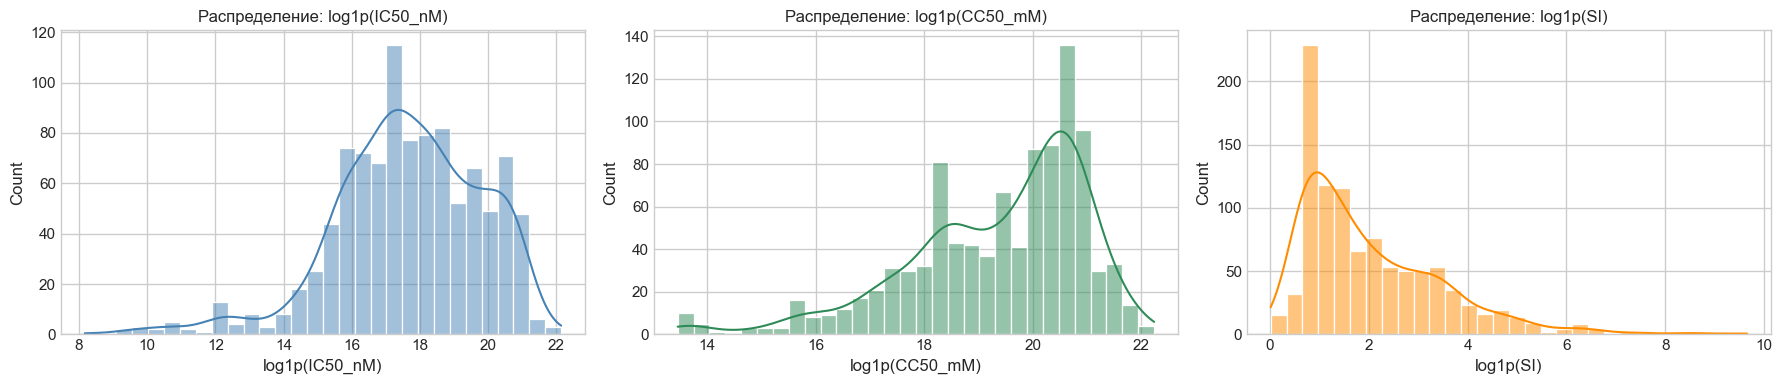

In [5]:
# === ЭТАП 1.2: Визуализация лог-таргетов ===
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 4))

# --- log1p(IC50_nM)
plt.subplot(1, 3, 1)
sns.histplot(df["log1p_IC50_nM"], kde=True, bins=30, color="steelblue")
plt.title("Распределение: log1p(IC50_nM)")
plt.xlabel("log1p(IC50_nM)")

# --- log1p(CC50_mM)
plt.subplot(1, 3, 2)
sns.histplot(df["log1p_CC50_mM"], kde=True, bins=30, color="seagreen")
plt.title("Распределение: log1p(CC50_mM)")
plt.xlabel("log1p(CC50_mM)")

# --- log1p(SI)
plt.subplot(1, 3, 3)
sns.histplot(df["log1p_SI"], kde=True, bins=30, color="darkorange")
plt.title("Распределение: log1p(SI)")
plt.xlabel("log1p(SI)")

plt.tight_layout()
plt.show()


📦 ЭТАП 2: Обработка выбросов методом IQR (асимметрично)

🔍 Обработка признака: log1p_IC50_nM


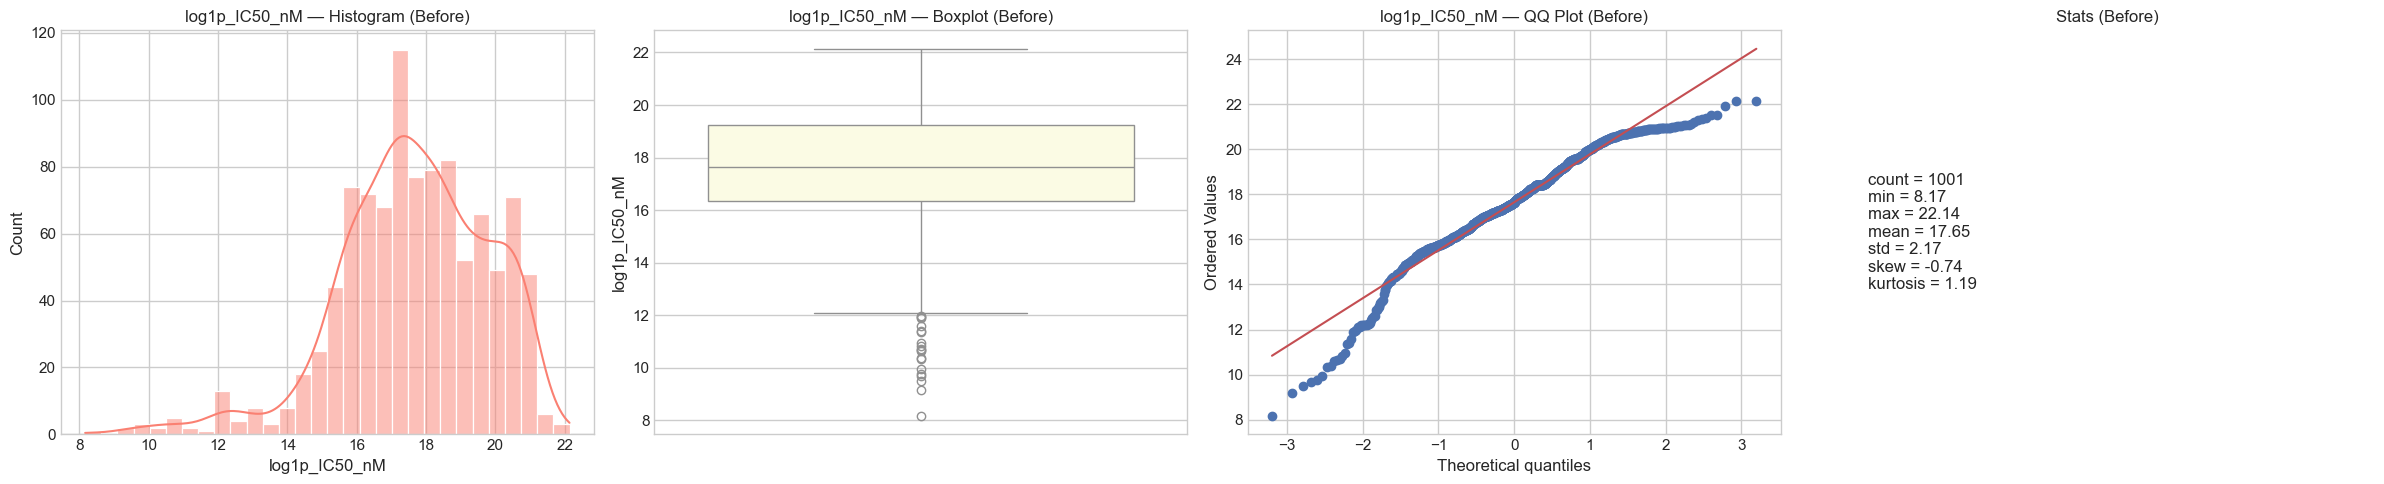

IQR = 2.889, границы: [12.009, 62.567]
До: min = 8.166, max = 22.141
После: min = 12.009, max = 22.141


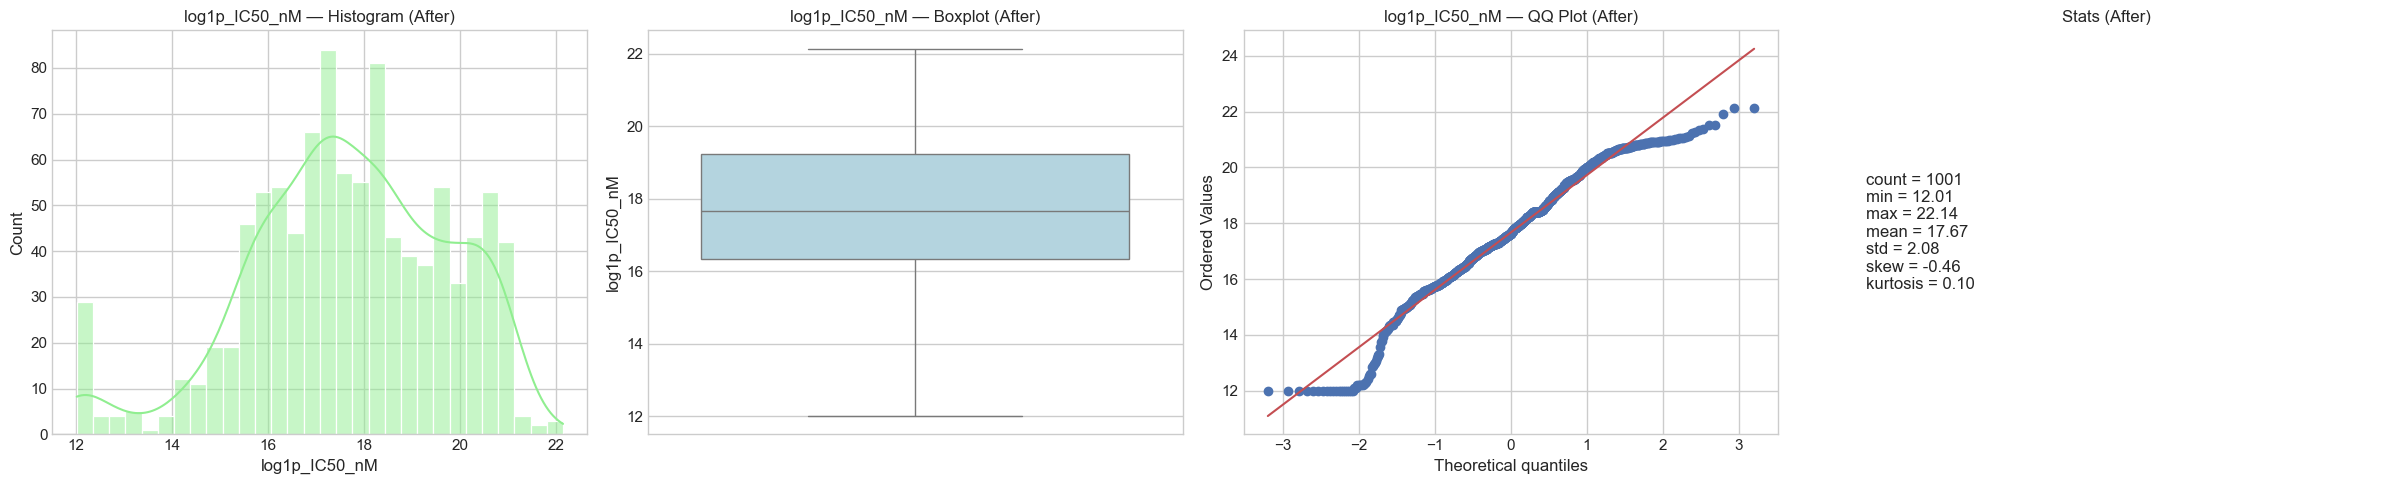


🔍 Обработка признака: log1p_CC50_mM


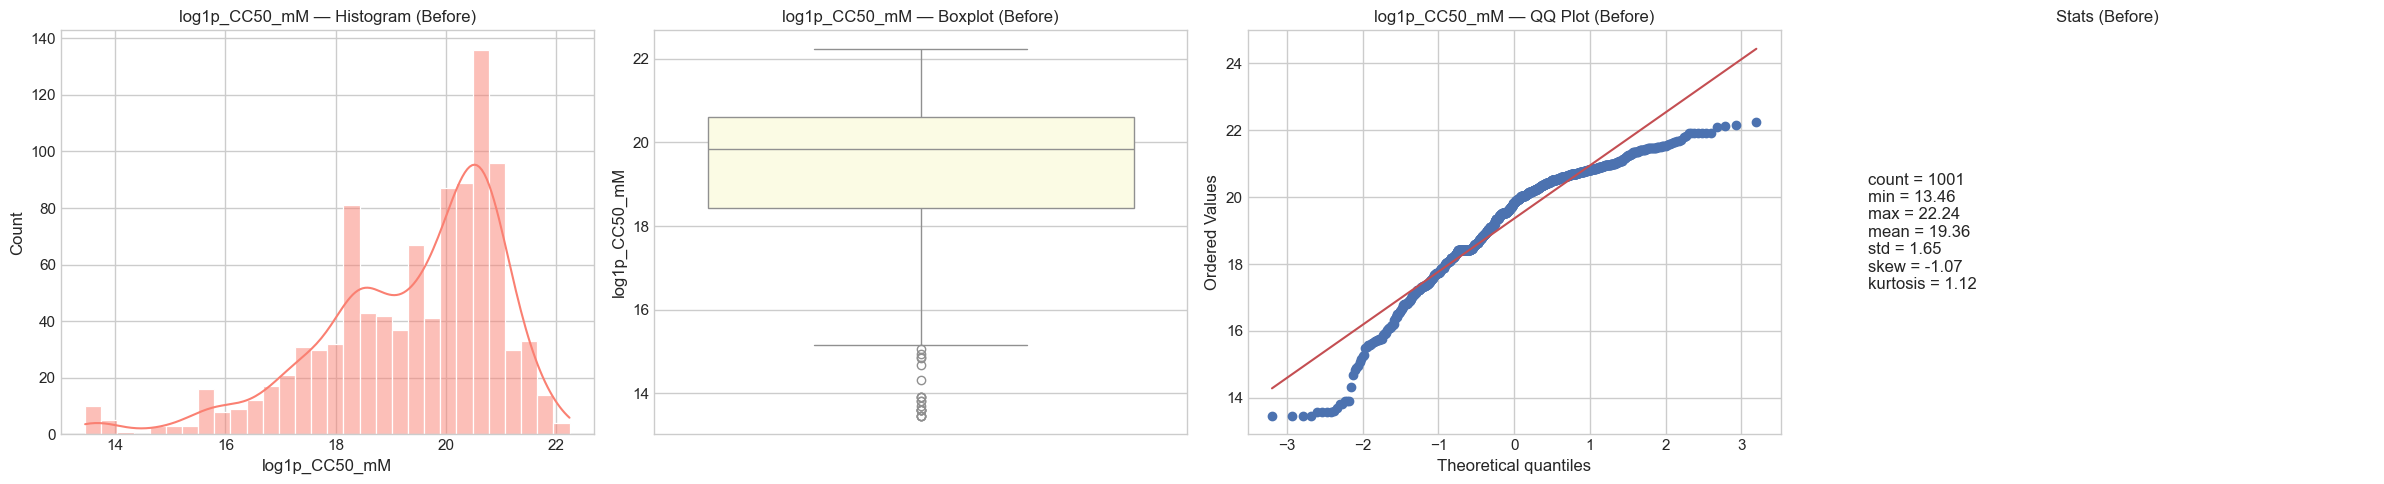

IQR = 2.191, границы: [15.135, 53.471]
До: min = 13.460, max = 22.236
После: min = 15.135, max = 22.236


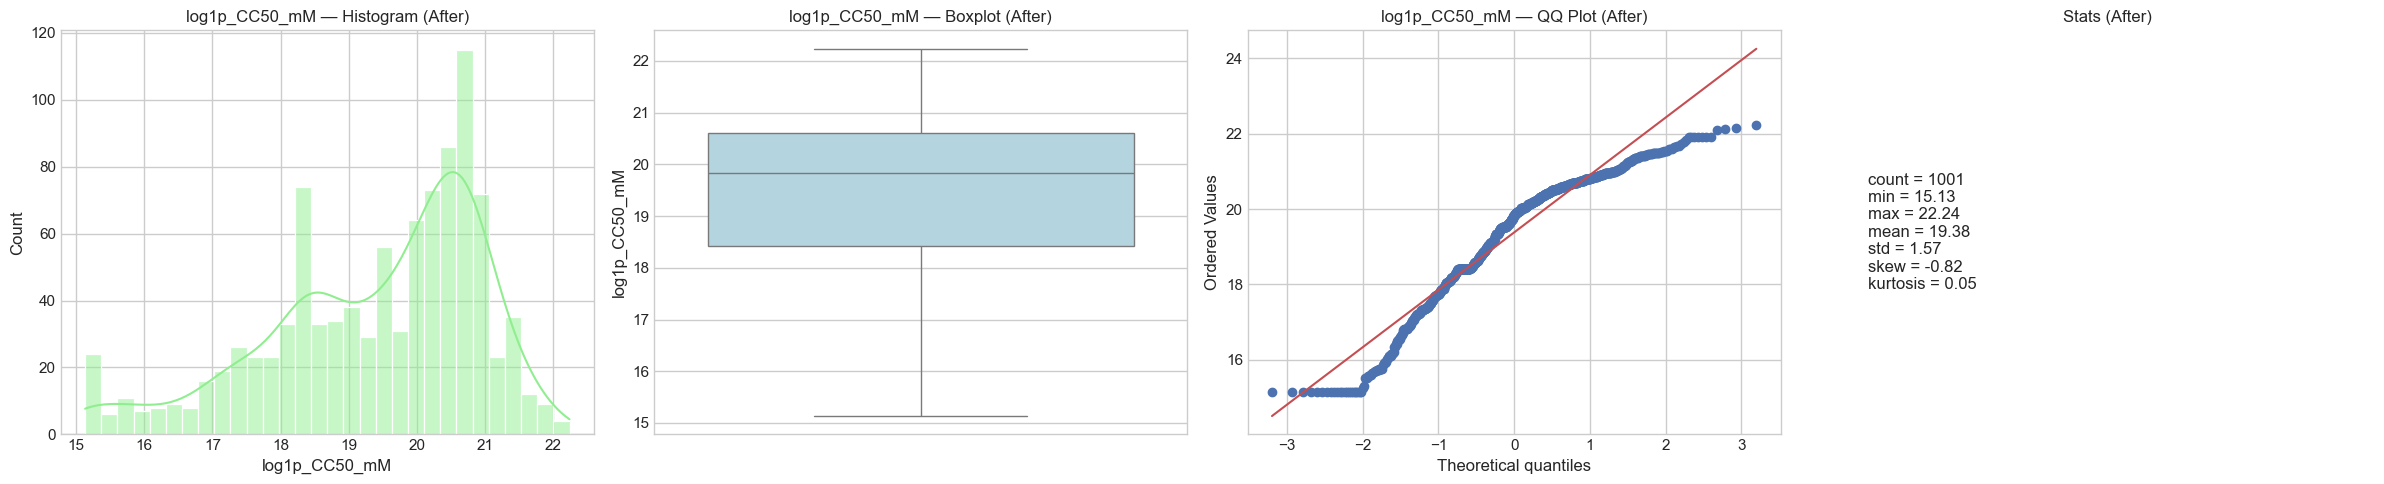


🔍 Обработка признака: log1p_SI


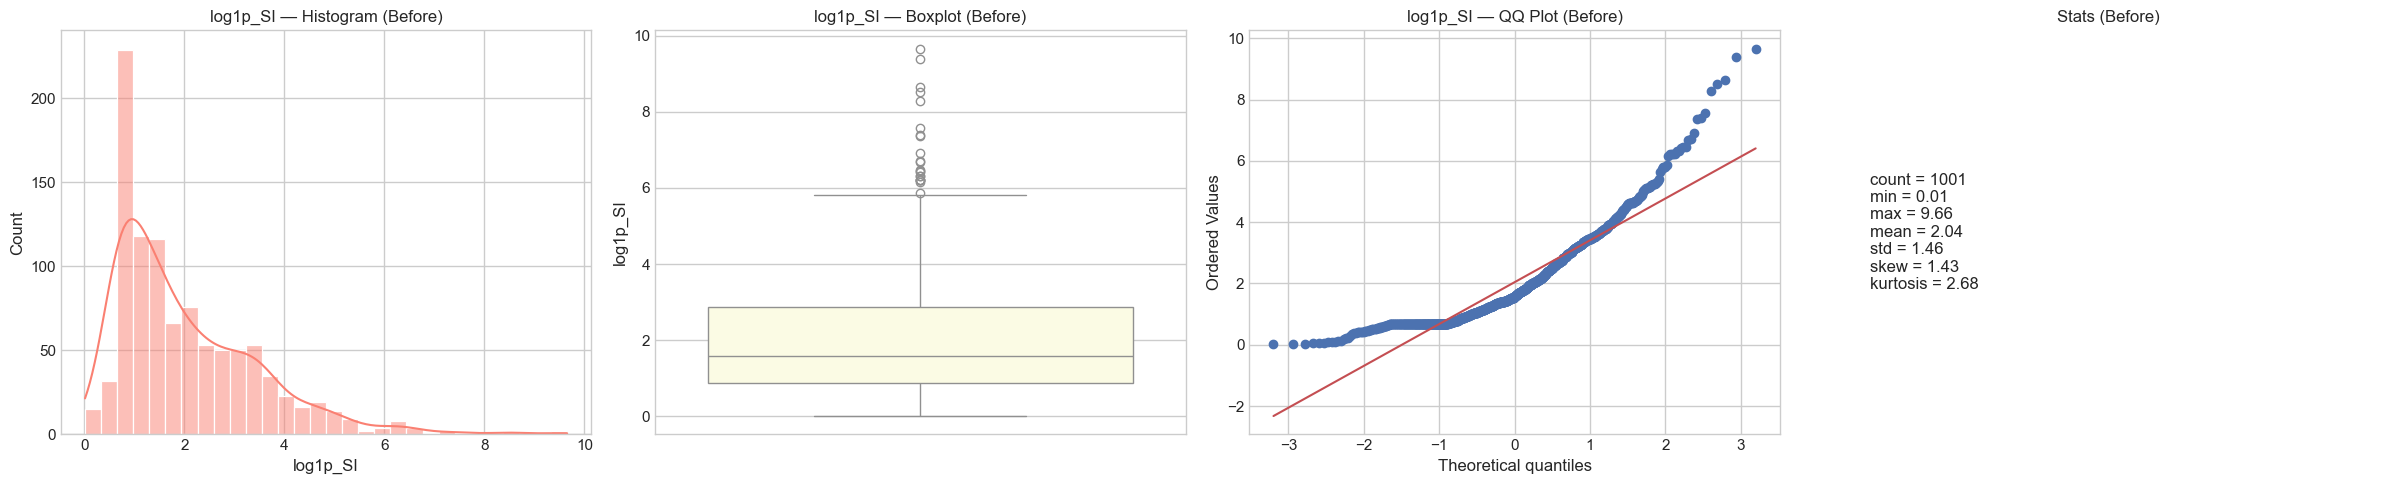

IQR = 1.977, границы: [-2.076, 32.517]
До: min = 0.011, max = 9.656
После: min = 0.011, max = 9.656


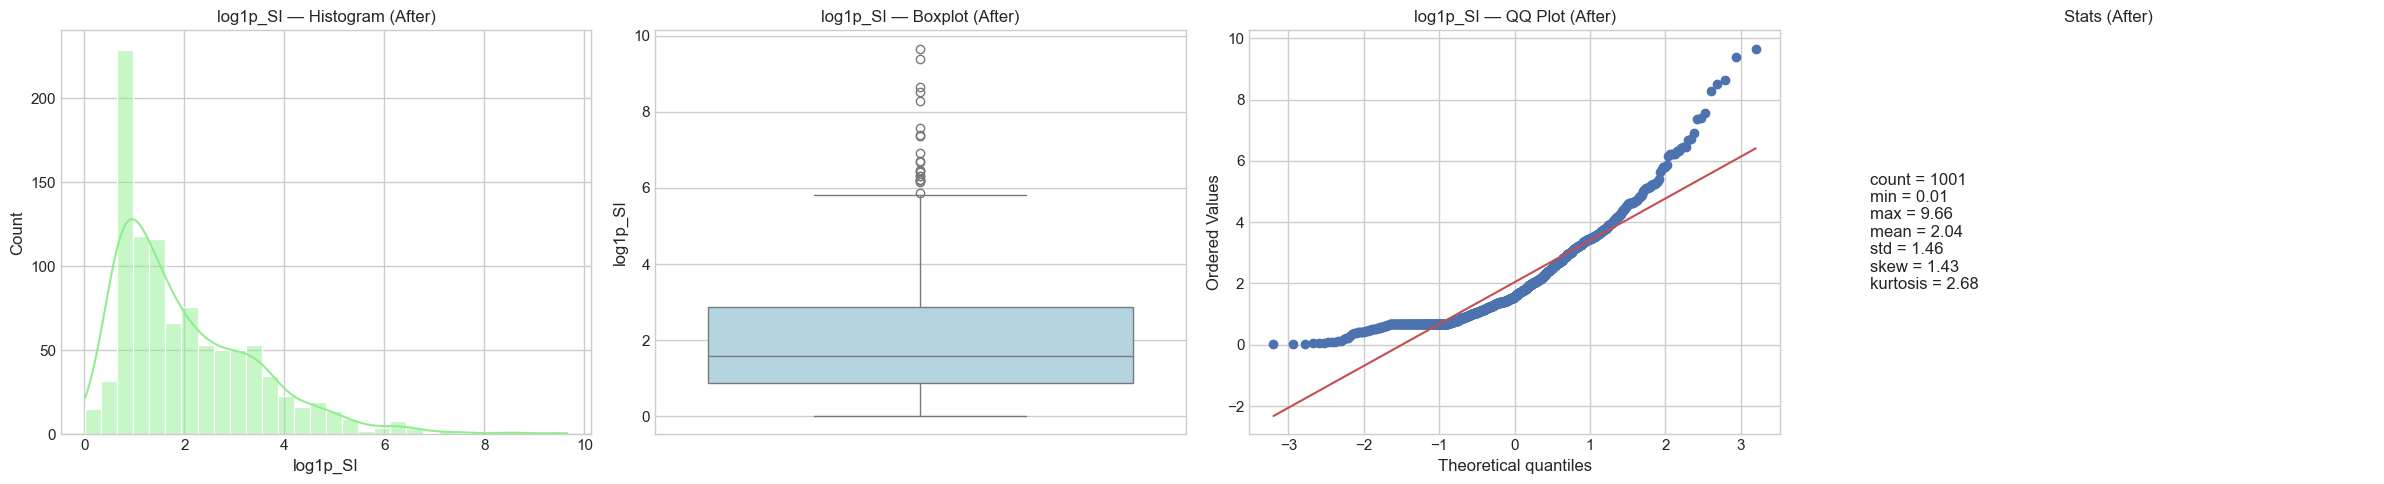

In [6]:
# === ЭТАП 2: Обработка выбросов методом IQR (асимметрично)

print("📦 ЭТАП 2: Обработка выбросов методом IQR (асимметрично)")


import os
import scipy.stats as stats
from matplotlib import gridspec

# Создание папки
os.makedirs("plotsjp/eda/outliers", exist_ok=True)

# --- Хелпер для вывода статистики на графике ---
def get_stats_text(series):
    text = (
        f"count = {series.count()}\n"
        f"min = {series.min():.2f}\n"
        f"max = {series.max():.2f}\n"
        f"mean = {series.mean():.2f}\n"
        f"std = {series.std():.2f}\n"
        f"skew = {series.skew():.2f}\n"
        f"kurtosis = {series.kurtosis():.2f}"
    )
    return text

# --- Функция очистки + графики до/после ---
def process_outliers(column):
    print(f"\n🔍 Обработка признака: {column}")

    # Графики до
    fig = plt.figure(figsize=(24, 5))
    spec = gridspec.GridSpec(ncols=4, nrows=1, figure=fig)

    ax0 = fig.add_subplot(spec[0, 0])
    sns.histplot(df[column], kde=True, bins=30, color="salmon", ax=ax0)
    ax0.set_title(f"{column} — Histogram (Before)")

    ax1 = fig.add_subplot(spec[0, 1])
    sns.boxplot(y=df[column], color="lightyellow", ax=ax1)
    ax1.set_title(f"{column} — Boxplot (Before)")

    ax2 = fig.add_subplot(spec[0, 2])
    stats.probplot(df[column], dist="norm", plot=ax2)
    ax2.set_title(f"{column} — QQ Plot (Before)")

    ax3 = fig.add_subplot(spec[0, 3])
    ax3.text(0.05, 0.5, get_stats_text(df[column]), fontsize=12, verticalalignment='center')
    ax3.axis("off")
    ax3.set_title("Stats (Before)")

    plt.tight_layout()
    plt.savefig(f"plotsjp/eda/outliers/{column}_before_outliers.png")
    plt.show()

    # --- IQR очистка ---
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 15 * iqr

    print(f"IQR = {iqr:.3f}, границы: [{lower:.3f}, {upper:.3f}]")
    print(f"До: min = {df[column].min():.3f}, max = {df[column].max():.3f}")
    df[column] = df[column].clip(lower=lower, upper=upper)
    print(f"После: min = {df[column].min():.3f}, max = {df[column].max():.3f}")

    # Графики после
    fig = plt.figure(figsize=(24, 5))
    spec = gridspec.GridSpec(ncols=4, nrows=1, figure=fig)

    ax0 = fig.add_subplot(spec[0, 0])
    sns.histplot(df[column], kde=True, bins=30, color="lightgreen", ax=ax0)
    ax0.set_title(f"{column} — Histogram (After)")

    ax1 = fig.add_subplot(spec[0, 1])
    sns.boxplot(y=df[column], color="lightblue", ax=ax1)
    ax1.set_title(f"{column} — Boxplot (After)")

    ax2 = fig.add_subplot(spec[0, 2])
    stats.probplot(df[column], dist="norm", plot=ax2)
    ax2.set_title(f"{column} — QQ Plot (After)")

    ax3 = fig.add_subplot(spec[0, 3])
    ax3.text(0.05, 0.5, get_stats_text(df[column]), fontsize=12, verticalalignment='center')
    ax3.axis("off")
    ax3.set_title("Stats (After)")

    plt.tight_layout()
    plt.savefig(f"plotsjp/eda/outliers/{column}_after_outliers.png")
    plt.show()

# --- Применение к 3 таргетам ---
target_columns = ["log1p_IC50_nM", "log1p_CC50_mM", "log1p_SI"]
for col in target_columns:
    process_outliers(col)


In [7]:
# === ЭТАП 2.4: Заполнение NaN медианой в числовых признаках ===

print("\n" + "="*60)
print("📦 ЭТАП 2.4: Заполнение NaN медианой в числовых колонках")
print("="*60)

# Количество пропусков до
total_na_before = df.isna().sum().sum()
na_per_column = df.isna().sum()
na_columns = na_per_column[na_per_column > 0]

if not na_columns.empty:
    print(f"🔍 Найдены пропуски в {len(na_columns)} колонках:")
    for col, n in na_columns.items():
        print(f"   - {col}: {n} пропусков")

    # Заполняем только числовые признаки
    df = df.copy()
    df = df.fillna(df.median(numeric_only=True))

    # Проверка после
    total_na_after = df.isna().sum().sum()
    print(f"✅ Пропусков до: {total_na_before}, после заполнения: {total_na_after}")
else:
    print("✅ Пропусков не найдено. Ничего не заполняем.")

# 💾 Сохраняем промежуточную версию
df.to_csv("data/eda_reg_step2_4.csv", index=False)
print("💾 Сохранено: data/eda_reg_step2_4.csv")



📦 ЭТАП 2.4: Заполнение NaN медианой в числовых колонках
🔍 Найдены пропуски в 12 колонках:
   - MaxPartialCharge: 3 пропусков
   - MinPartialCharge: 3 пропусков
   - MaxAbsPartialCharge: 3 пропусков
   - MinAbsPartialCharge: 3 пропусков
   - BCUT2D_MWHI: 3 пропусков
   - BCUT2D_MWLOW: 3 пропусков
   - BCUT2D_CHGHI: 3 пропусков
   - BCUT2D_CHGLO: 3 пропусков
   - BCUT2D_LOGPHI: 3 пропусков
   - BCUT2D_LOGPLOW: 3 пропусков
   - BCUT2D_MRHI: 3 пропусков
   - BCUT2D_MRLOW: 3 пропусков
✅ Пропусков до: 36, после заполнения: 0
💾 Сохранено: data/eda_reg_step2_4.csv


In [8]:
# === ЭТАП 2.5: Feature Engineering ===

print("📦 ЭТАП 2.5: Feature Engineering")


# === Вычисляем новые признаки в отдельном DataFrame ===
feats = pd.DataFrame(index=df.index)

feats["AtomsPerMolWt"] = df["NumValenceElectrons"] / (df["MolWt"] + 1e-5)
feats["ChargeAsymmetry"] = np.abs(df["MaxPartialCharge"] - df["MinPartialCharge"])
feats["Polarization"] = df["MaxAbsPartialCharge"] * df["LabuteASA"]
feats["TPSA_ratio"] = df["TPSA"] / (df["MolWt"] + 1e-5)
feats["AromaticRingDensity"] = df["NumAromaticRings"] / (df["RingCount"] + 1e-5)
feats["LogMolWt"] = np.log1p(df["MolWt"])

# === Объединяем с оригинальным датафреймом ===
df = pd.concat([df, feats], axis=1)

print("✅ Добавленные признаки:")
for col in feats.columns:
    print(f"— {col}")

print("\n📊 Статистика новых признаков:")
display(feats.describe().T)

# === Сохраняем результат ===
df.to_csv("data/eda_reg_step2_fe.csv", index=False)
print("💾 Сохранено: data/eda_reg_step2_fe.csv")


📦 ЭТАП 2.5: Feature Engineering
✅ Добавленные признаки:
— AtomsPerMolWt
— ChargeAsymmetry
— Polarization
— TPSA_ratio
— AromaticRingDensity
— LogMolWt

📊 Статистика новых признаков:


count       mean        std       min        25%        50%        75%         max
AtomsPerMolWt        1001.0   0.382151   0.025183  0.260802   0.367859   0.384797   0.402820    0.421064
ChargeAsymmetry      1001.0   0.643189   0.173978  0.082119   0.490950   0.694857   0.792077    1.156770
Polarization         1001.0  62.217082  27.806931  8.002665  42.494870  56.553897  76.087269  179.377273
TPSA_ratio           1001.0   0.174721   0.108062  0.000000   0.112128   0.154962   0.205879    0.596486
AromaticRingDensity  1001.0   0.395774   0.344260  0.000000   0.000000   0.333333   0.624999    0.999999
LogMolWt             1001.0   5.794151   0.349841  4.710935   5.580940   5.757187   6.016847    6.808793

💾 Сохранено: data/eda_reg_step2_fe.csv


/var/folders/1n/sg1kqlnx1n3bvy5wgbg3j18c0000gn/T/ipykernel_14176/532179569.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


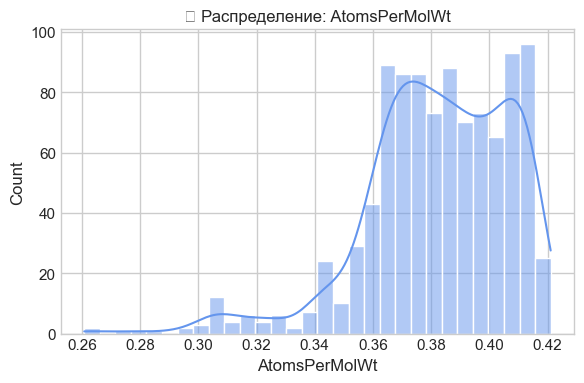

/var/folders/1n/sg1kqlnx1n3bvy5wgbg3j18c0000gn/T/ipykernel_14176/532179569.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


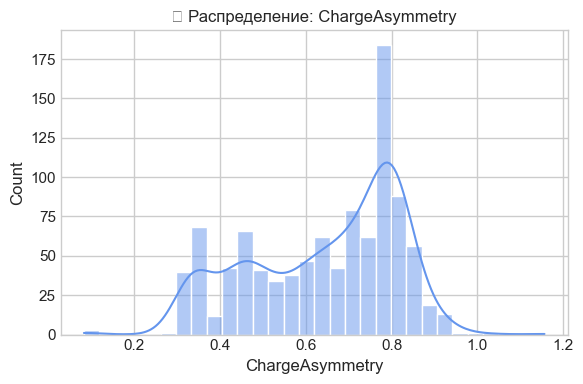

/var/folders/1n/sg1kqlnx1n3bvy5wgbg3j18c0000gn/T/ipykernel_14176/532179569.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


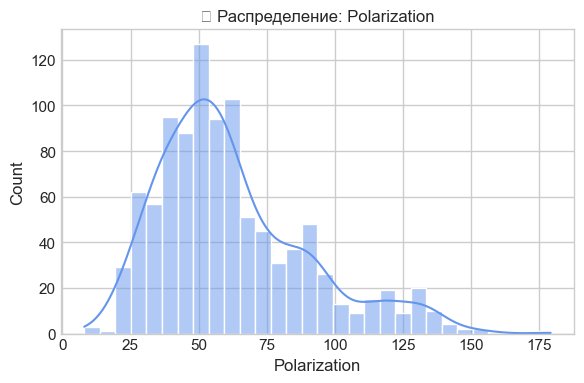

/var/folders/1n/sg1kqlnx1n3bvy5wgbg3j18c0000gn/T/ipykernel_14176/532179569.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


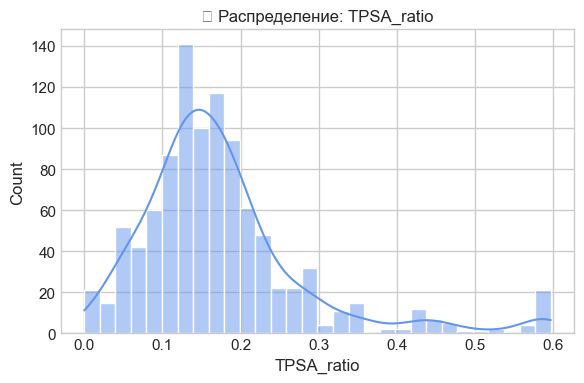

/var/folders/1n/sg1kqlnx1n3bvy5wgbg3j18c0000gn/T/ipykernel_14176/532179569.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


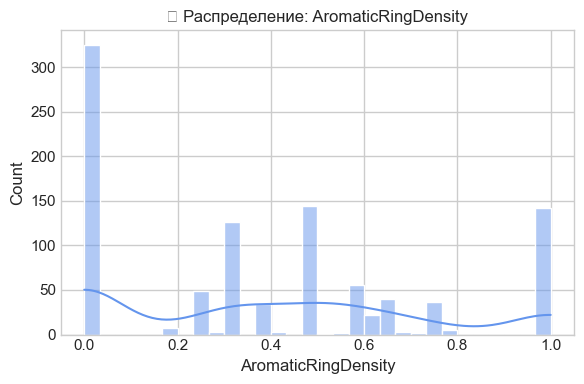

/var/folders/1n/sg1kqlnx1n3bvy5wgbg3j18c0000gn/T/ipykernel_14176/532179569.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


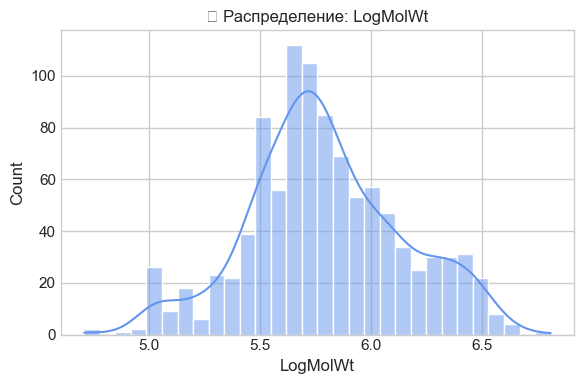

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === Загрузка данных ===
df = pd.read_csv("data/eda_reg_step2_fe.csv")

# === Список потенциально добавленных признаков ===
engineered_features = [
    "AtomsPerMolWt",
    "ChargeAsymmetry",
    "Polarization",
    "TPSA_ratio",
    "AromaticRingDensity",
    "LogMolWt"
]

# === Визуализация каждого из добавленных признаков ===
for feature in engineered_features:
    if feature in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[feature], kde=True, bins=30, color="cornflowerblue")
        plt.title(f"📊 Распределение: {feature}")
        plt.xlabel(feature)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Признак не найден в данных: {feature}")


In [10]:
# === Шаг 3.1: Удаление константных признаков ===
print("\n🔍 Удаление константных признаков...")

n_cols_before = df.shape[1]

constant_cols = df.columns[df.nunique() <= 1].tolist()
df = df.drop(columns=constant_cols)

print(f"🗑️ Удалено {len(constant_cols)} константных признаков.")
if constant_cols:
    print("➡ Константные признаки:", constant_cols)

print(f"📊 После удаления: {df.shape[1]} признаков")



🔍 Удаление константных признаков...
🗑️ Удалено 18 константных признаков.
➡ Константные признаки: ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'fr_N_O', 'fr_SH', 'fr_azide', 'fr_barbitur', 'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan', 'fr_isothiocyan', 'fr_lactam', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_thiocyan']
📊 После удаления: 208 признаков


In [11]:
# === Шаг 3.2: Удаление признаков с низкой дисперсией ===
from sklearn.feature_selection import VarianceThreshold

print("\n🔍 Удаление признаков с низкой дисперсией...")

# Порог можно настраивать, обычно 0.01 или 0.05
threshold = 0.01
selector = VarianceThreshold(threshold=threshold)
selector.fit(df.select_dtypes(include=[np.number]))

# Маска: какие признаки остались
support_mask = selector.get_support()
low_variance_cols = df.select_dtypes(include=[np.number]).columns[~support_mask].tolist()

# Удаляем
df = df.drop(columns=low_variance_cols)

print(f"🗑️ Удалено {len(low_variance_cols)} признаков с низкой дисперсией (threshold = {threshold})")
if low_variance_cols:
    print("➡ Низковариативные признаки:", low_variance_cols)

print(f"📊 Оставшиеся признаки: {df.shape[1]}")



🔍 Удаление признаков с низкой дисперсией...
🗑️ Удалено 17 признаков с низкой дисперсией (threshold = 0.01)
➡ Низковариативные признаки: ['MinPartialCharge', 'MaxAbsPartialCharge', 'fr_Ar_COO', 'fr_HOCCN', 'fr_aldehyde', 'fr_amidine', 'fr_azo', 'fr_epoxide', 'fr_guanido', 'fr_hdrzine', 'fr_nitrile', 'fr_oxazole', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_urea', 'AtomsPerMolWt']
📊 Оставшиеся признаки: 191


In [12]:
# === Сохраняем промежуточный датафрейм после этапа 3 ===
df.to_csv("data/eda_reg_step3.csv", index=False)
print("\n💾 Сохранено: data/eda_reg_step3.csv")



💾 Сохранено: data/eda_reg_step3.csv


In [13]:
# === ЭТАП 4: Удаление признаков, напрямую связанных с таргетами или утечкой ===
print("\n🚫 Удаление признаков, напрямую связанных с таргетами и потенциальной утечкой")

# Полный список признаков, которые нужно удалить по отчёту
leakage_cols = [
    # Таргеты и их логарифмы
    "IC50, mM", "CC50, mM", "SI",
    "IC50_nM", "CC50_mM", "SI_raw",
    "log1p_IC50_nM", "log1p_CC50_mM", "log1p_SI",

    # Неинформативный по отчёту дескриптор
    "SPS",

    # Технический индекс, не несёт смысла
    "Unnamed: 0"
]

# Удаляем колонки, если они есть
existing_cols_to_drop = [col for col in leakage_cols if col in df.columns]
df = df.drop(columns=existing_cols_to_drop)

print(f"🗑️ Удалено {len(existing_cols_to_drop)} признаков:")
print(existing_cols_to_drop)

print(f"📊 Размерность после удаления таргет-связанных признаков: {df.shape}")

# Сохраняем датафрейм
df.to_csv("data/eda_reg_step4.csv", index=False)
print("\n💾 Сохранено: data/eda_reg_step4.csv")



🚫 Удаление признаков, напрямую связанных с таргетами и потенциальной утечкой
🗑️ Удалено 11 признаков:
['IC50, mM', 'CC50, mM', 'SI', 'IC50_nM', 'CC50_mM', 'SI_raw', 'log1p_IC50_nM', 'log1p_CC50_mM', 'log1p_SI', 'SPS', 'Unnamed: 0']
📊 Размерность после удаления таргет-связанных признаков: (1001, 180)

💾 Сохранено: data/eda_reg_step4.csv


✅ Загружен: (1001, 180)

🔍 Mutual Information для задачи: IC50
💾 Сохранено: data/top_mi_ic50.csv


/var/folders/1n/sg1kqlnx1n3bvy5wgbg3j18c0000gn/T/ipykernel_14176/3053843408.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.head(20), y=mi_series.head(20).index, palette="viridis")


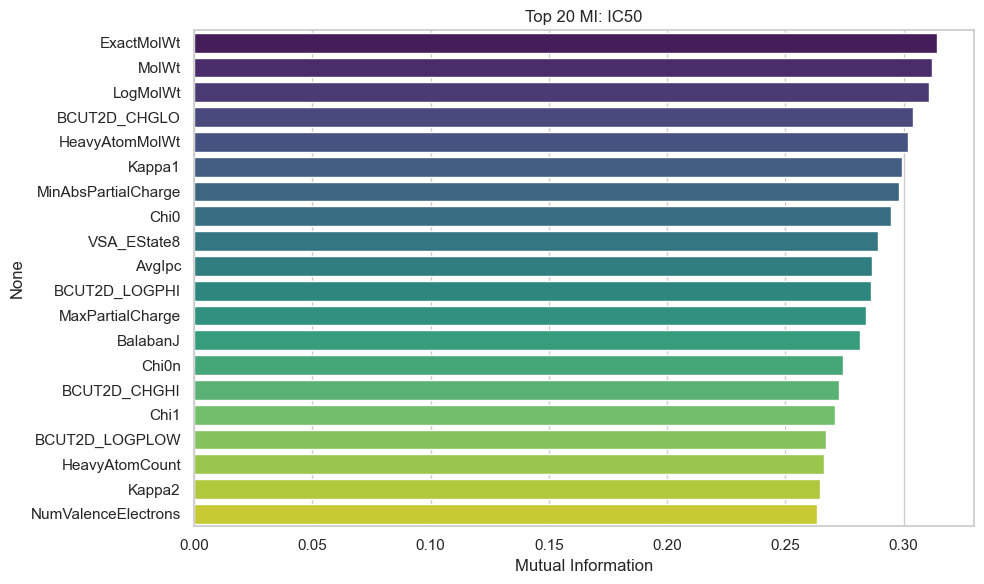


🔍 Mutual Information для задачи: CC50
💾 Сохранено: data/top_mi_cc50.csv


/var/folders/1n/sg1kqlnx1n3bvy5wgbg3j18c0000gn/T/ipykernel_14176/3053843408.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.head(20), y=mi_series.head(20).index, palette="viridis")


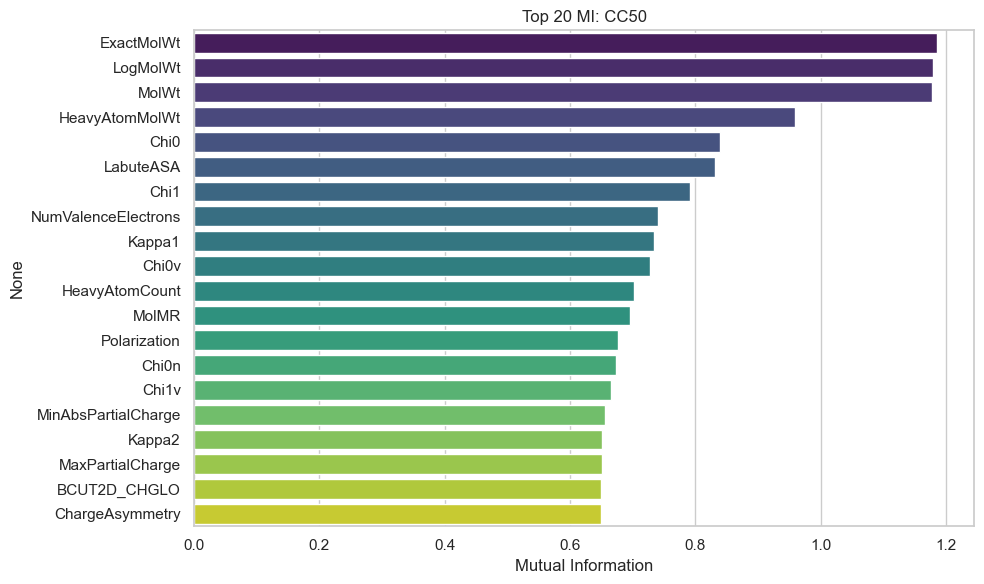


🔍 Mutual Information для задачи: SI
💾 Сохранено: data/top_mi_si.csv


/var/folders/1n/sg1kqlnx1n3bvy5wgbg3j18c0000gn/T/ipykernel_14176/3053843408.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.head(20), y=mi_series.head(20).index, palette="viridis")


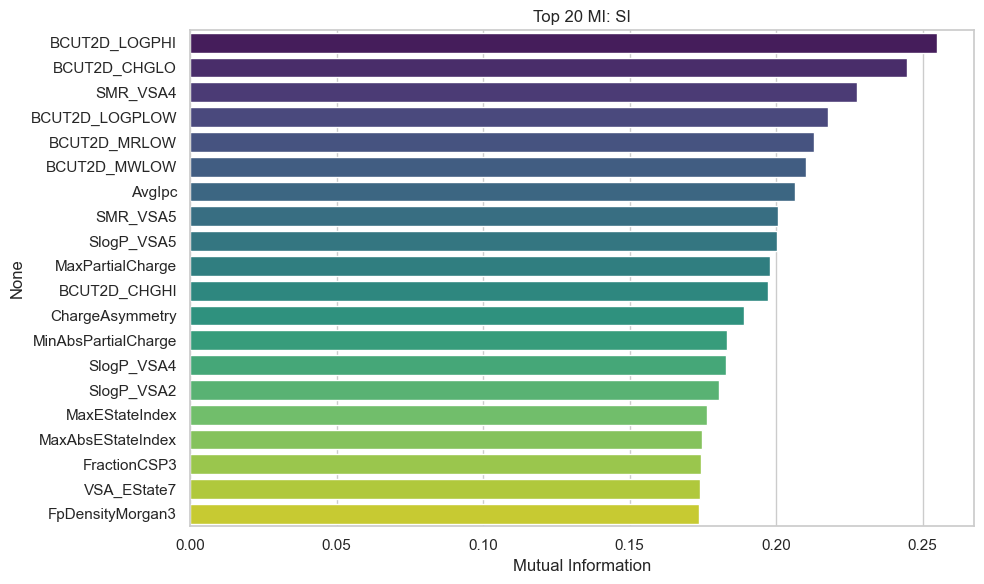

In [14]:
# === ЭТАП 5: Mutual Information — отбор признаков ===

import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === Настройки ===
sns.set(style="whitegrid")
os.makedirs("plotsjp/eda/mi", exist_ok=True)
os.makedirs("data", exist_ok=True)

# === Загрузка данных ===
df = pd.read_csv("data/eda_reg_step4.csv")
print("✅ Загружен:", df.shape)

# === Целевые переменные и названия задач ===
targets = {
    "log1p_IC50_nM": "IC50",
    "log1p_CC50_mM": "CC50",
    "log1p_SI": "SI"
}

# === Расчёт MI по каждой задаче ===
for target_col, task_name in targets.items():
    print(f"\n🔍 Mutual Information для задачи: {task_name}")

    df_full = pd.read_excel("data/Данные_для_курсовои_Классическое_МО.xlsx")
    df_full["IC50_nM"] = df_full["IC50, mM"] * 1e6
    df_full["log1p_IC50_nM"] = np.log1p(df_full["IC50_nM"])
    df_full["CC50_mM"] = df_full["CC50, mM"]
    df_full["log1p_CC50_mM"] = np.log1p(df_full["CC50_mM"])
    df_full["SI_raw"] = df_full["SI"]
    df_full["log1p_SI"] = np.log1p(df_full["SI_raw"])

    y = df_full[target_col]
    X = df.copy()

    # Заполняем пропуски
    X = X.fillna(X.median())

    # === Расчёт MI ===
    mi = mutual_info_regression(X, y, random_state=42)
    mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

    # === Сохранение в файл ===
    mi_series.to_csv(f"data/top_mi_{task_name.lower()}.csv")
    print(f"💾 Сохранено: data/top_mi_{task_name.lower()}.csv")

    # === Визуализация ===
    plt.figure(figsize=(10, 6))
    sns.barplot(x=mi_series.head(20), y=mi_series.head(20).index, palette="viridis")
    plt.title(f"Top 20 MI: {task_name}")
    plt.xlabel("Mutual Information")
    plt.tight_layout()
    plt.savefig(f"plotsjp/eda/mi/top_mi_{task_name.lower()}.png")
    plt.show()



📊 Статистика MI для задачи: IC50
🔢 Всего признаков: 180
✅ Признаков с MI > 0.01: 165
✅ Признаков с MI > 0.05: 124
✅ Признаков с MI > 0.1 : 104

📌 Топ-200 признаков:
ExactMolWt        0.314068
MolWt             0.312193
LogMolWt          0.310929
BCUT2D_CHGLO      0.304184
HeavyAtomMolWt    0.301665
                    ...   
fr_hdrzone        0.001132
fr_piperzine      0.000000
fr_morpholine     0.000000
fr_oxime          0.000000
fr_ArN            0.000000
Length: 180, dtype: float64


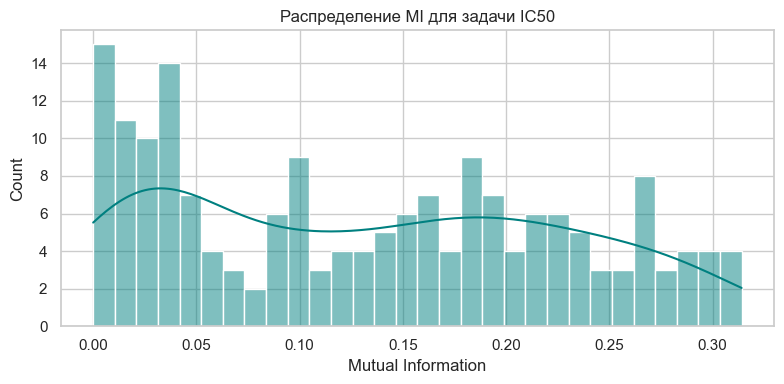


📊 Статистика MI для задачи: CC50
🔢 Всего признаков: 180
✅ Признаков с MI > 0.01: 172
✅ Признаков с MI > 0.05: 156
✅ Признаков с MI > 0.1 : 132

📌 Топ-200 признаков:
ExactMolWt               1.185150
LogMolWt                 1.178697
MolWt                    1.176926
HeavyAtomMolWt           0.958900
Chi0                     0.839362
                           ...   
fr_ArN                   0.005986
fr_para_hydroxylation    0.004018
fr_piperzine             0.003405
SMR_VSA2                 0.003370
fr_oxime                 0.000000
Length: 180, dtype: float64


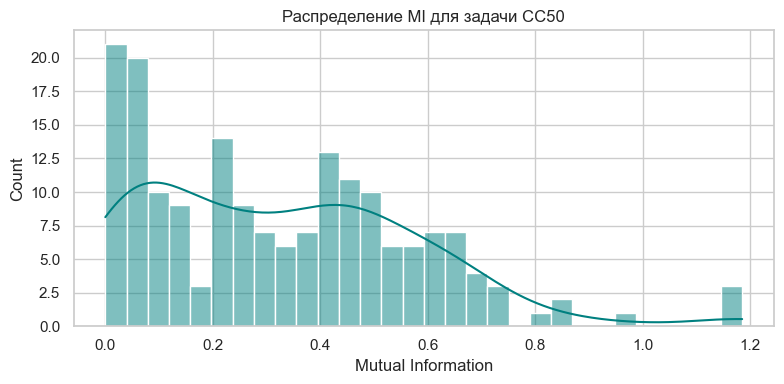


📊 Статистика MI для задачи: SI
🔢 Всего признаков: 180
✅ Признаков с MI > 0.01: 156
✅ Признаков с MI > 0.05: 119
✅ Признаков с MI > 0.1 : 80

📌 Топ-200 признаков:
BCUT2D_LOGPHI         0.254757
BCUT2D_CHGLO          0.244534
SMR_VSA4              0.227405
BCUT2D_LOGPLOW        0.217596
BCUT2D_MRLOW          0.212748
                        ...   
fr_alkyl_carbamate    0.000000
fr_Ndealkylation2     0.000000
fr_NH1                0.000000
SMR_VSA2              0.000000
fr_Ar_NH              0.000000
Length: 180, dtype: float64


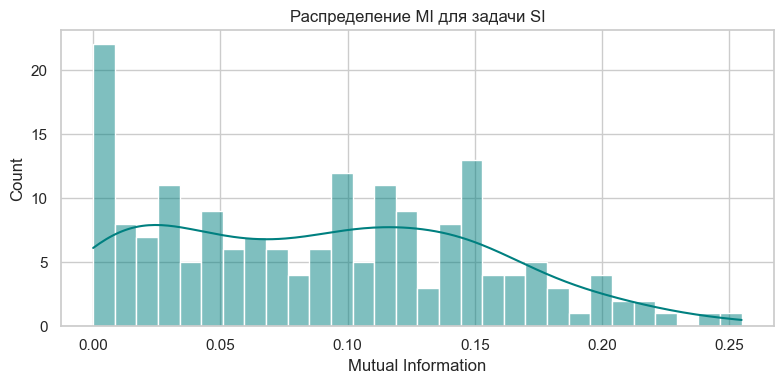

In [15]:
# === ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ MI: текстовая статистика ===

for target_col, task_name in targets.items():
    print(f"\n📊 Статистика MI для задачи: {task_name}")

    # Загружаем MI-оценки (предполагается, что они в 2 колонках: Feature, MI)
    mi_path = f"data/top_mi_{task_name.lower()}.csv"
    mi_df = pd.read_csv(mi_path)

    # Преобразуем в Series
    mi_series = pd.Series(data=mi_df.iloc[:, 1].values, index=mi_df.iloc[:, 0].values)
    mi_series = mi_series.sort_values(ascending=False)

    # Общая статистика
    print(f"🔢 Всего признаков: {len(mi_series)}")
    print(f"✅ Признаков с MI > 0.01: {(mi_series > 0.01).sum()}")
    print(f"✅ Признаков с MI > 0.05: {(mi_series > 0.05).sum()}")
    print(f"✅ Признаков с MI > 0.1 : {(mi_series > 0.1).sum()}")

    print("\n📌 Топ-200 признаков:")
    print(mi_series.head(200))

    # Визуализация распределения MI
    plt.figure(figsize=(8, 4))
    sns.histplot(mi_series, bins=30, kde=True, color="teal")
    plt.title(f"Распределение MI для задачи {task_name}")
    plt.xlabel("Mutual Information")
    plt.tight_layout()
    plt.show()


✅ Загрузка завершена: (1001, 180)


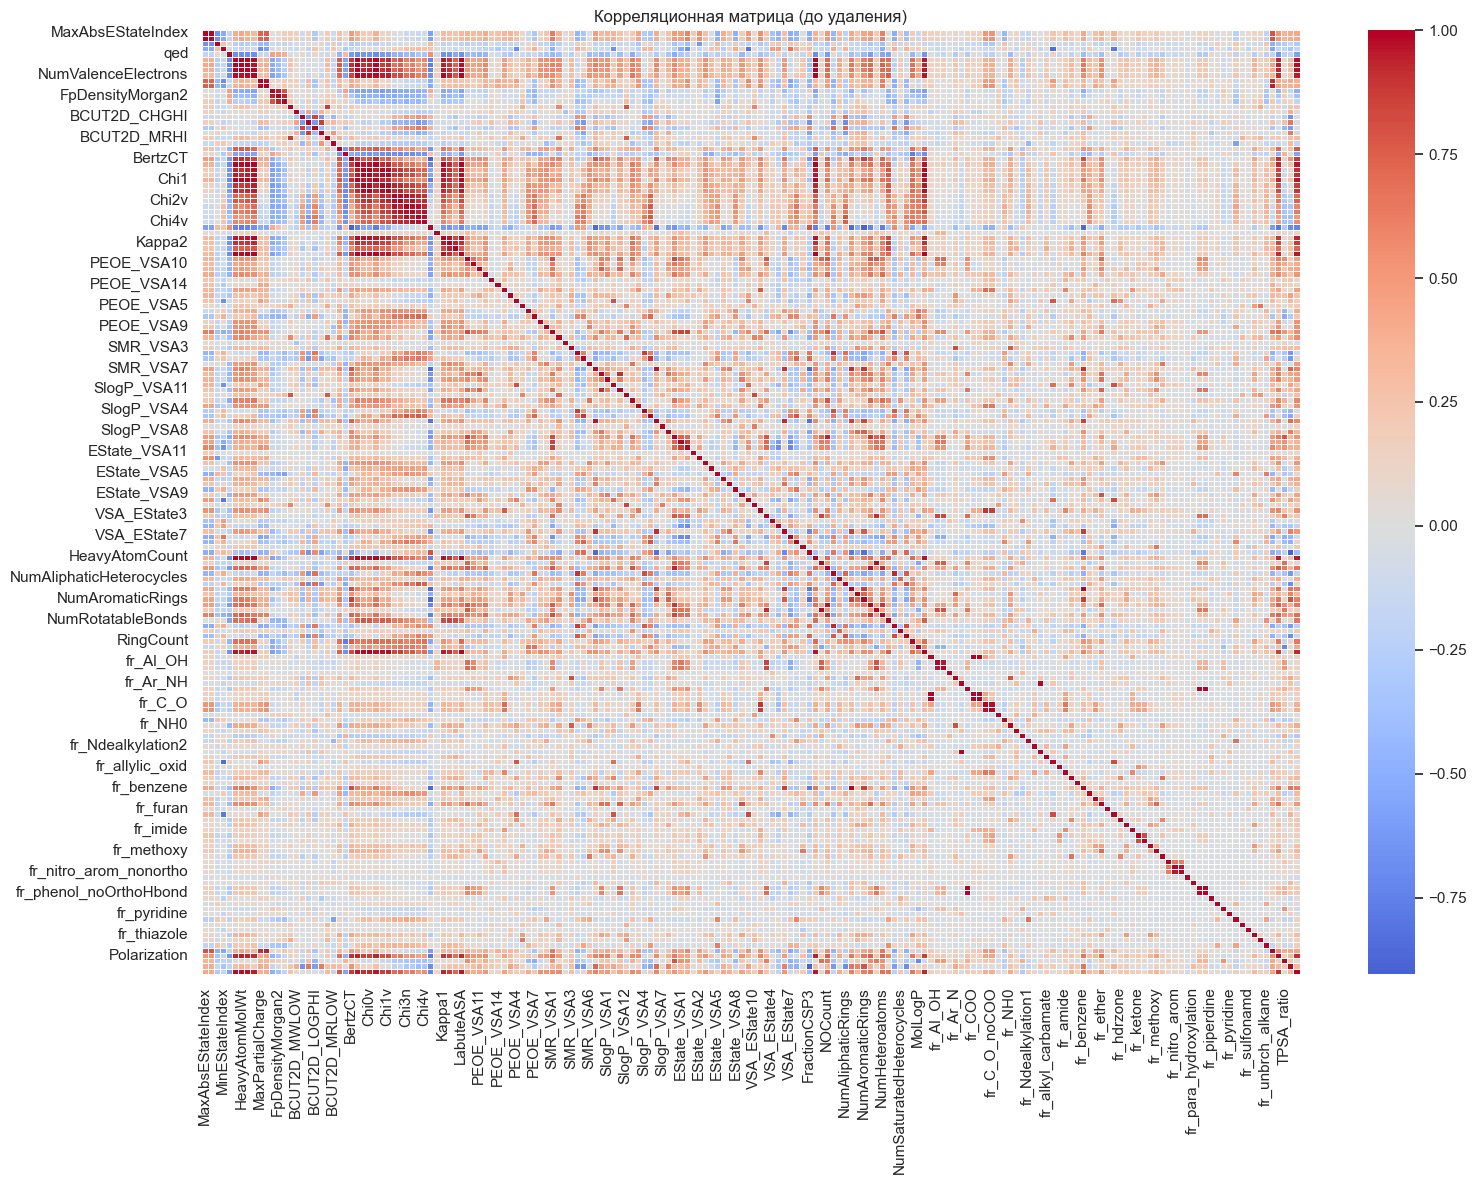


🔍 Удаление признаков с корреляцией > 0.9
🗑️ Удалено 49 признаков по корреляции > 0.9
➡ Удалённые признаки: ['MaxEStateIndex', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'MinAbsPartialCharge', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'SlogP_VSA11', 'SlogP_VSA6', 'VSA_EState6', 'HeavyAtomCount', 'NOCount', 'NumAromaticCarbocycles', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumSaturatedCarbocycles', 'MolMR', 'fr_Al_OH_noTert', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_Nhpyrrole', 'fr_benzene', 'fr_nitro_arom_nonortho', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'ChargeAsymmetry', 'Polarization', 'LogMolWt']
📝 Сохранено описание удалённых признаков: data/deleted_features_with_reasons.csv
📊 После удаления: (1001, 131)


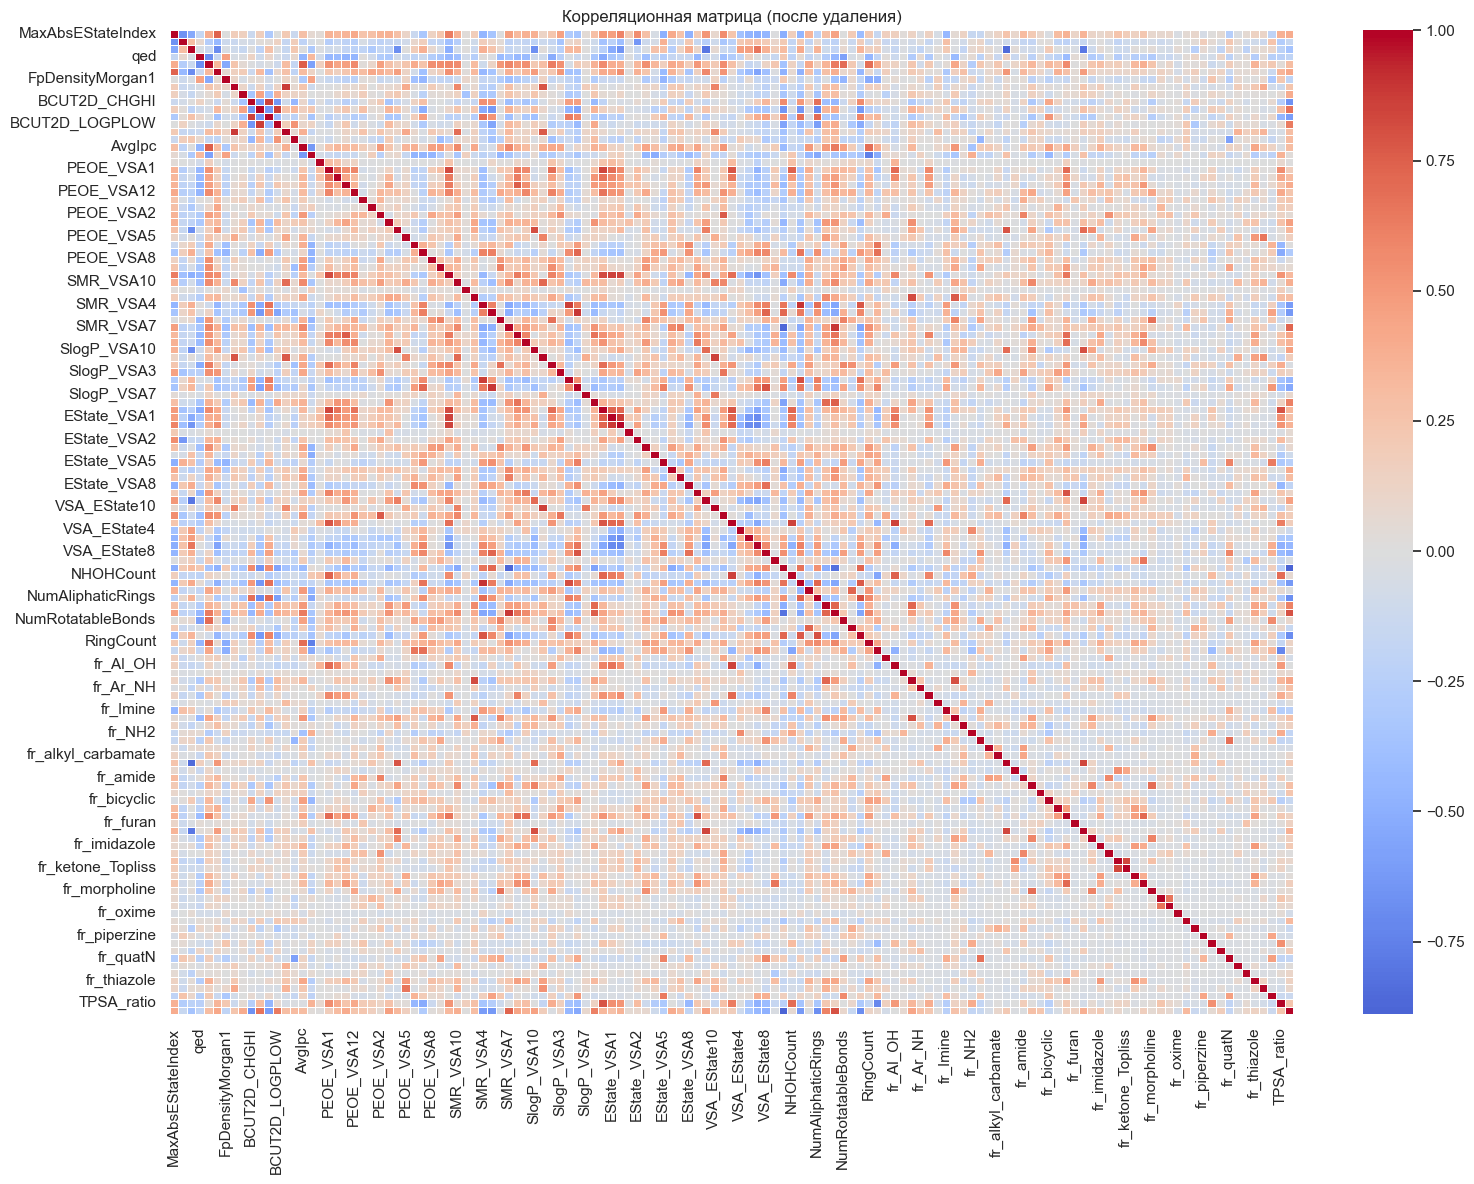

💾 Сохранено: data/eda_reg_step6.csv


In [16]:
# === ЭТАП 6: Удаление скоррелированных признаков

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# === Параметры ===
CORR_THRESHOLD = 0.9
SAVE_PATH = "data/eda_reg_step6.csv"
PLOT_BEFORE = "plotsjp/eda/corr_matrix_before.png"
PLOT_AFTER = "plotsjp/eda/corr_matrix_after.png"
DROP_LOG_PATH = "data/deleted_features_with_reasons.csv"

# === Создание директорий ===
os.makedirs("plotsjp/eda", exist_ok=True)
os.makedirs("data", exist_ok=True)

# === Загрузка данных ===
df = pd.read_csv("data/eda_reg_step4.csv")
print("✅ Загрузка завершена:", df.shape)

# === Корреляционная матрица до удаления ===
plt.figure(figsize=(16, 12))
corr_before = df.corr(numeric_only=True)
sns.heatmap(corr_before, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Корреляционная матрица (до удаления)")
plt.tight_layout()
plt.savefig(PLOT_BEFORE)
plt.show()

# === Удаление скоррелированных признаков ===
print("\n🔍 Удаление признаков с корреляцией >", CORR_THRESHOLD)

corr_matrix = df.corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [
    column for column in upper_triangle.columns
    if any(upper_triangle[column] > CORR_THRESHOLD)
]

print(f"🗑️ Удалено {len(to_drop)} признаков по корреляции > {CORR_THRESHOLD}")
print("➡ Удалённые признаки:", to_drop)

# Сохраним удалённые признаки в CSV
pd.DataFrame({"feature": to_drop, "reason": f"correlation>{CORR_THRESHOLD}"}).to_csv(DROP_LOG_PATH, index=False)
print(f"📝 Сохранено описание удалённых признаков: {DROP_LOG_PATH}")

# Удаление
df_filtered = df.drop(columns=to_drop)
print(f"📊 После удаления: {df_filtered.shape}")

# === Корреляционная матрица после удаления ===
plt.figure(figsize=(16, 12))
corr_after = df_filtered.corr(numeric_only=True)
sns.heatmap(corr_after, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Корреляционная матрица (после удаления)")
plt.tight_layout()
plt.savefig(PLOT_AFTER)
plt.show()

# === Сохранение результата ===
df_filtered.to_csv(SAVE_PATH, index=False)
print(f"💾 Сохранено: {SAVE_PATH}")


In [17]:
# === ЭТАП 7: Масштабирование признаков ===

import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

# Пути
INPUT_PATH = "data/eda_reg_step6.csv"
OUTPUT_PATH = "data/X_scaled.csv"

# Загрузка данных
df = pd.read_csv(INPUT_PATH)
print(f"✅ Загружено: {df.shape}")


# Масштабирование всех числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Сохраняем масштабированный DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)
X_scaled_df.to_csv(OUTPUT_PATH, index=False)

print(f"💾 Масштабированные признаки сохранены: {OUTPUT_PATH}")
print(f"📊 Размерность X_scaled: {X_scaled_df.shape}")


✅ Загружено: (1001, 131)
💾 Масштабированные признаки сохранены: data/X_scaled.csv
📊 Размерность X_scaled: (1001, 131)


✅ Загружено: (1001, 131)

📌 Проекция для задачи: IC50


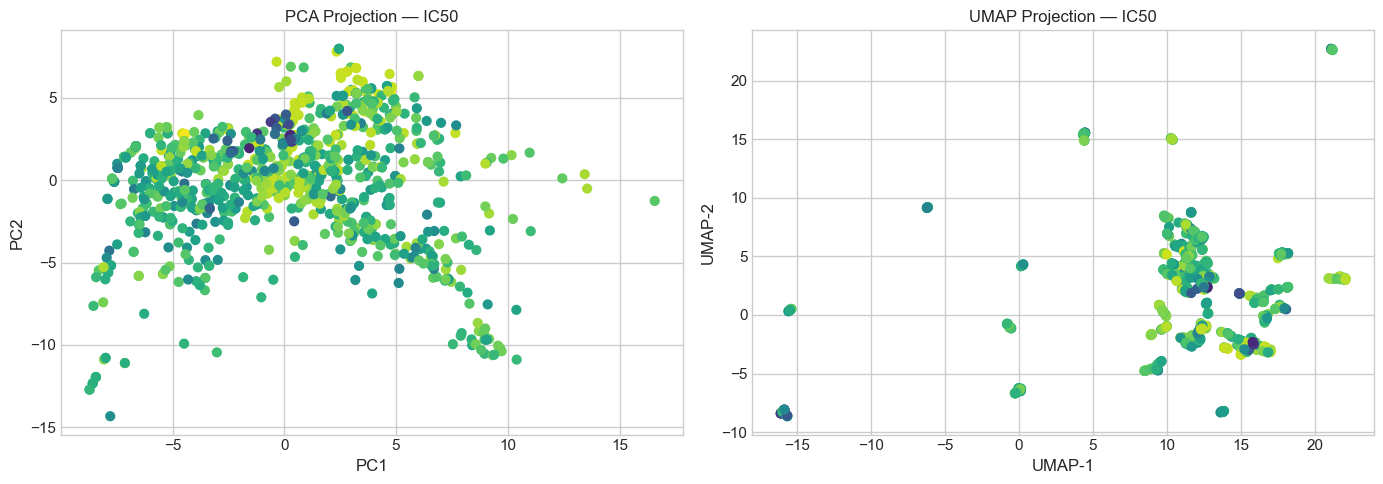


📌 Проекция для задачи: CC50


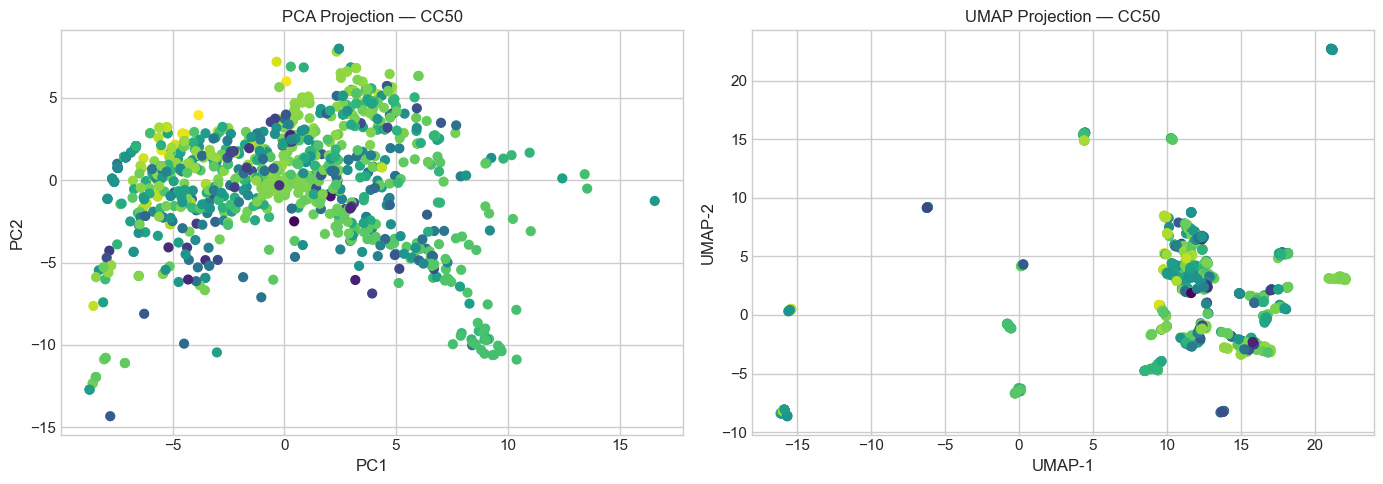


📌 Проекция для задачи: SI


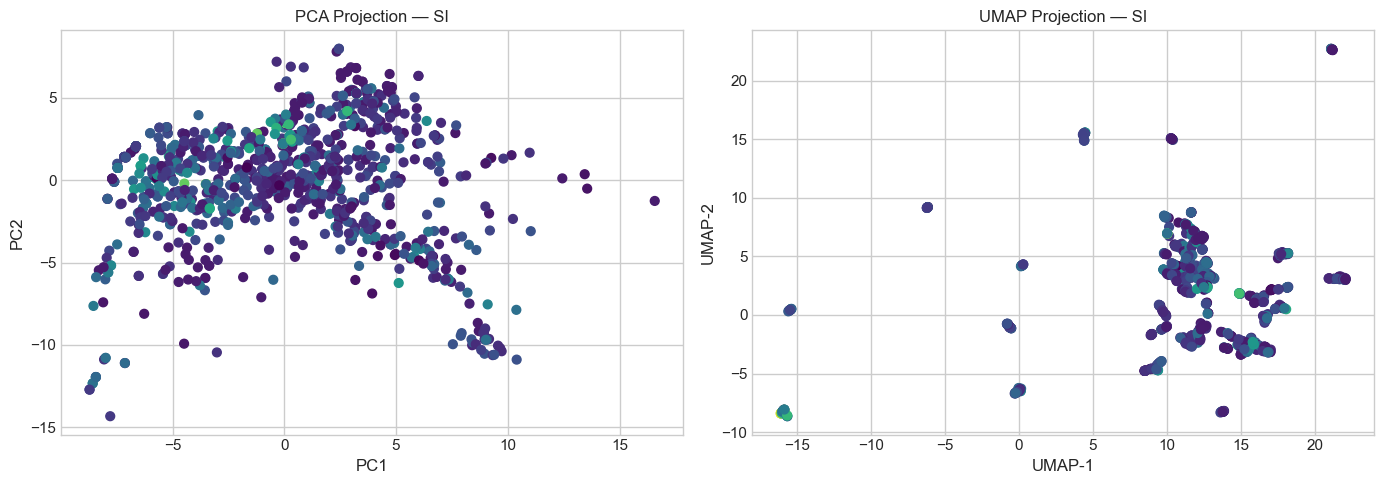

In [18]:
# === ЭТАП 8: Проекции PCA и UMAP ===

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import umap.umap_ as umap
import warnings

# === Настройки ===
sns.set(style="whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")
os.makedirs("plotsjp/eda/projections", exist_ok=True)

# === Загрузка данных ===
df_raw = pd.read_excel("data/Данные_для_курсовои_Классическое_МО.xlsx")
X_scaled = pd.read_csv("data/X_scaled.csv")
print("✅ Загружено:", X_scaled.shape)

# === Проверка пропусков ===
if X_scaled.isna().sum().sum() > 0:
    print("⚠️ Найдены пропуски. Заполняем медианой...")
    X_scaled = X_scaled.fillna(X_scaled.median())

# === Подготовка таргетов ===
df_raw["IC50_nM"] = df_raw["IC50, mM"] * 1e6
df_raw["log1p_IC50_nM"] = np.log1p(df_raw["IC50_nM"])
df_raw["CC50_mM"] = df_raw["CC50, mM"]
df_raw["log1p_CC50_mM"] = np.log1p(df_raw["CC50_mM"])
df_raw["SI_raw"] = df_raw["SI"]
df_raw["log1p_SI"] = np.log1p(df_raw["SI_raw"])

tasks = {
    "IC50": "log1p_IC50_nM",
    "CC50": "log1p_CC50_mM",
    "SI": "log1p_SI"
}

def plot_projections(X, y, task_name):
    reducer_umap = umap.UMAP(n_components=2, random_state=42, n_jobs=1)
    reducer_pca = PCA(n_components=2, random_state=42)

    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        X_umap = reducer_umap.fit_transform(X)

    X_pca = reducer_pca.fit_transform(X)

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", s=40)
    axs[0].set_title(f"PCA Projection — {task_name}")
    axs[0].set_xlabel("PC1")
    axs[0].set_ylabel("PC2")

    axs[1].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap="viridis", s=40)
    axs[1].set_title(f"UMAP Projection — {task_name}")
    axs[1].set_xlabel("UMAP-1")
    axs[1].set_ylabel("UMAP-2")

    plt.tight_layout()
    plt.savefig(f"plotsjp/eda/projections/{task_name.lower()}_pca_umap.png")
    plt.show()

# === Запуск проекций для каждой задачи ===
for name, col in tasks.items():
    print(f"\n📌 Проекция для задачи: {name}")
    y = df_raw[col]
    plot_projections(X_scaled, y, name)


In [19]:
import os
import pandas as pd
import numpy as np

def scan_data_folder(data_dir="data"):
    print(f"\n🔎 Сканируем папку: {data_dir}")
    files = [f for f in os.listdir(data_dir) if f.endswith(('.csv', '.xlsx'))]

    if not files:
        print("❌ Нет файлов .csv или .xlsx в указанной папке.")
        return

    for file in files:
        path = os.path.join(data_dir, file)
        print(f"\n📂 Проверка файла: {file}")

        # Загрузка файла
        try:
            if file.endswith(".csv"):
                df = pd.read_csv(path)
            elif file.endswith(".xlsx"):
                df = pd.read_excel(path)
        except Exception as e:
            print(f"⚠️ Ошибка загрузки: {e}")
            continue

        # Проверка NaN
        nan_cols = df.columns[df.isna().any()].tolist()
        if nan_cols:
            print(f"🚨 Найдены NaN в колонках ({len(nan_cols)}):")
            for col in nan_cols:
                print(f"   - {col}: {df[col].isna().sum()} пропусков")
        else:
            print("✅ Нет NaN.")

        # Проверка inf и -inf
        numeric_df = df.select_dtypes(include=[np.number])
        pos_inf = np.isposinf(numeric_df).sum()
        neg_inf = np.isneginf(numeric_df).sum()

        total_inf = pos_inf.sum() + neg_inf.sum()
        if total_inf > 0:
            print(f"♾️ Найдены ±inf (всего: {int(total_inf)}):")
            for col in numeric_df.columns:
                n_pos = pos_inf[col]
                n_neg = neg_inf[col]
                if n_pos > 0 or n_neg > 0:
                    print(f"   - {col}: +inf = {int(n_pos)}, -inf = {int(n_neg)}")
        else:
            print("✅ Нет ±inf.")

# ✅ Вызов функции
scan_data_folder("data")



🔎 Сканируем папку: data

📂 Проверка файла: eda_reg_step2_4.csv
✅ Нет NaN.
✅ Нет ±inf.

📂 Проверка файла: top_mi_si.csv
✅ Нет NaN.
✅ Нет ±inf.

📂 Проверка файла: top_mi_cc50.csv
✅ Нет NaN.
✅ Нет ±inf.

📂 Проверка файла: data_final.csv
✅ Нет NaN.
✅ Нет ±inf.

📂 Проверка файла: data_clean_pruned.csv
✅ Нет NaN.
✅ Нет ±inf.

📂 Проверка файла: eda_reg_step2_fe.csv
✅ Нет NaN.
✅ Нет ±inf.

📂 Проверка файла: Данные_для_курсовои_Классическое_МО.xlsx
🚨 Найдены NaN в колонках (12):
   - MaxPartialCharge: 3 пропусков
   - MinPartialCharge: 3 пропусков
   - MaxAbsPartialCharge: 3 пропусков
   - MinAbsPartialCharge: 3 пропусков
   - BCUT2D_MWHI: 3 пропусков
   - BCUT2D_MWLOW: 3 пропусков
   - BCUT2D_CHGHI: 3 пропусков
   - BCUT2D_CHGLO: 3 пропусков
   - BCUT2D_LOGPHI: 3 пропусков
   - BCUT2D_LOGPLOW: 3 пропусков
   - BCUT2D_MRHI: 3 пропусков
   - BCUT2D_MRLOW: 3 пропусков
✅ Нет ±inf.

📂 Проверка файла: top_mi_ic50.csv
✅ Нет NaN.
✅ Нет ±inf.

📂 Проверка файла: deleted_features_with_reasons.csv
✅ Нет 

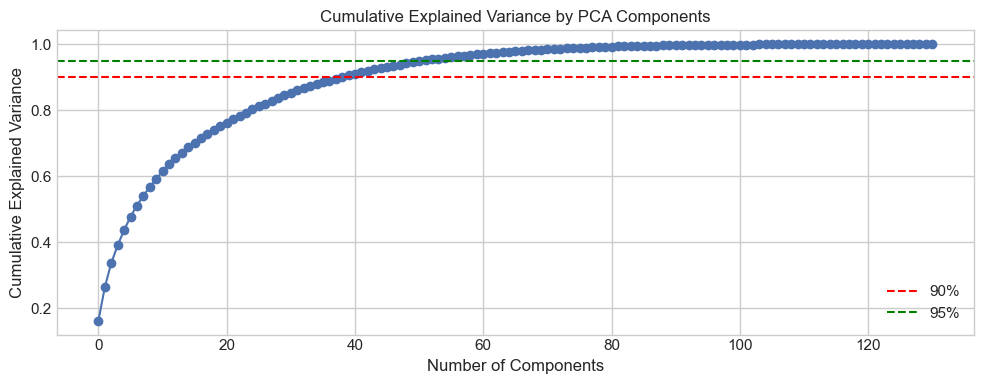

In [20]:
# === 8.1. Расчёт доли объяснённой дисперсии для PCA

from sklearn.decomposition import PCA

pca = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 4))
plt.plot(explained_variance, marker='o')
plt.axhline(0.90, color='red', linestyle='--', label='90%')
plt.axhline(0.95, color='green', linestyle='--', label='95%')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("plotsjp/eda/projections/pca_explained_variance.png")
plt.show()


In [21]:
# Можно сохранить матрицы PCA и UMAP
X_pca = pca.transform(X_scaled)
np.save("data/X_pca.npy", X_pca)

# Аналогично для UMAP
reducer_umap = umap.UMAP(n_components=2, random_state=42, n_jobs=1)
X_umap = reducer_umap.fit_transform(X_scaled)
np.save("data/X_umap.npy", X_umap)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



📊 SHAP-анализ и обучение модели: IC50
📊 Метрики качества:
R²:   0.5253
RMSE: 1.5834
MAE:  1.2506


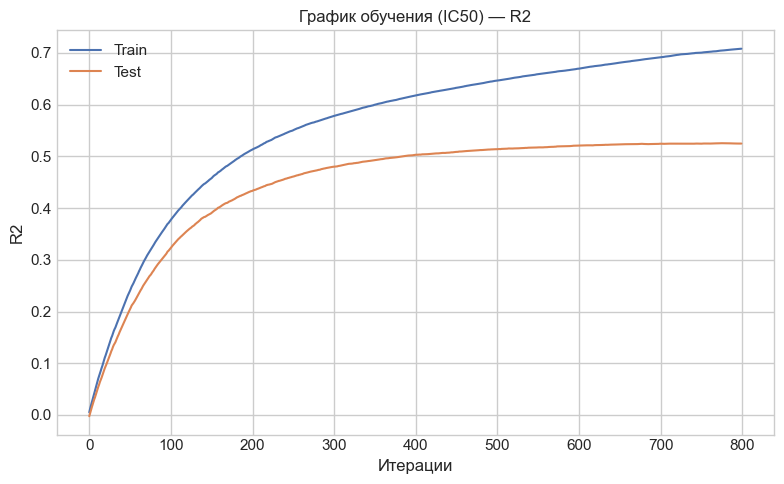

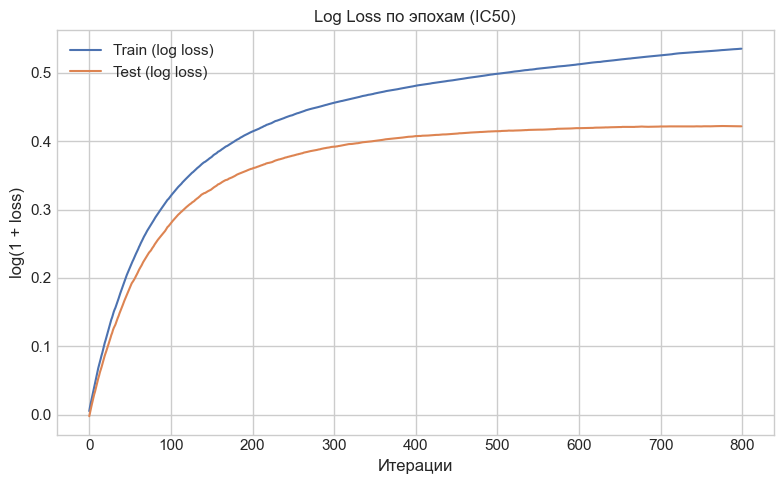

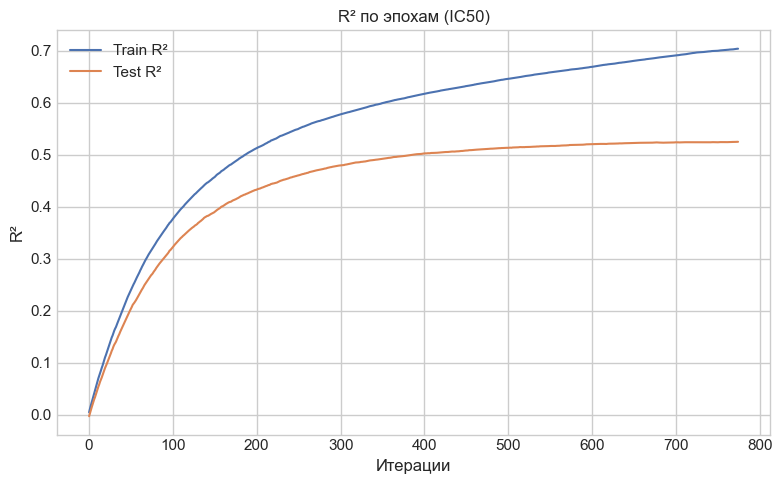

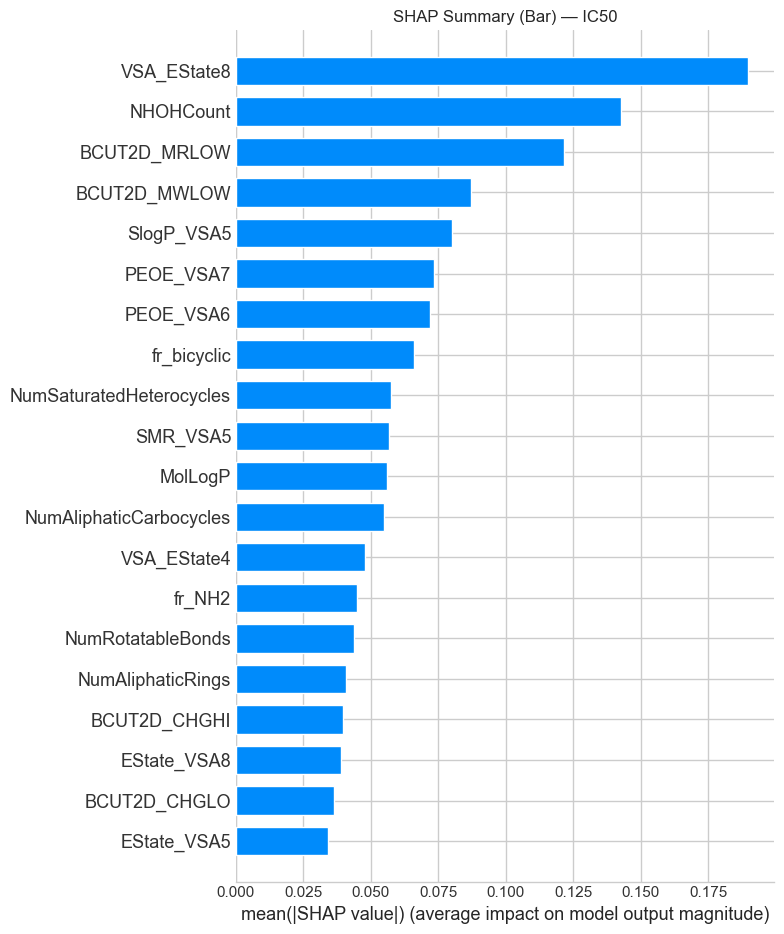

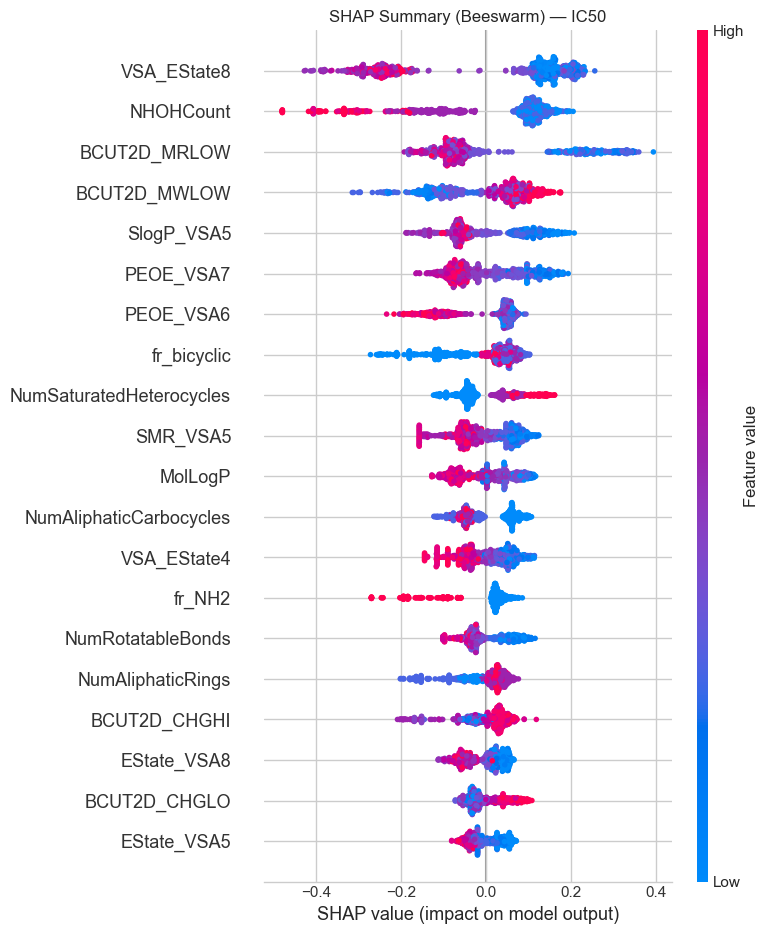

✅ Сохранено 66 признаков: data/selected_features_ic50.txt

📊 SHAP-анализ и обучение модели: CC50
📊 Метрики качества:
R²:   0.4629
RMSE: 1.1052
MAE:  0.8295


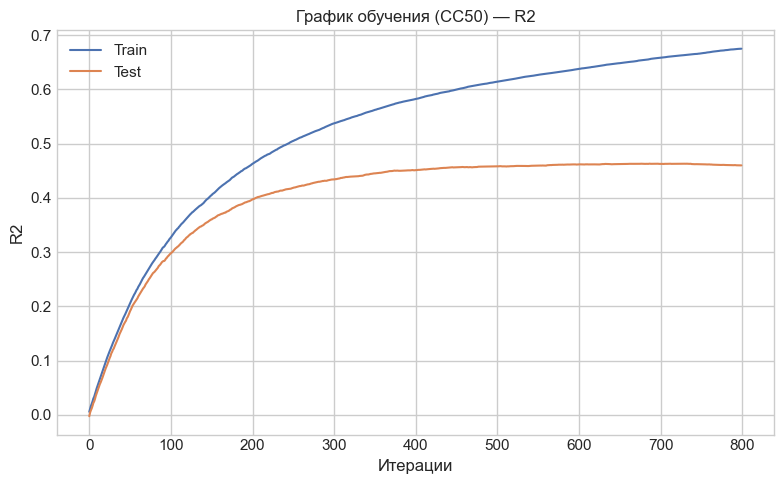

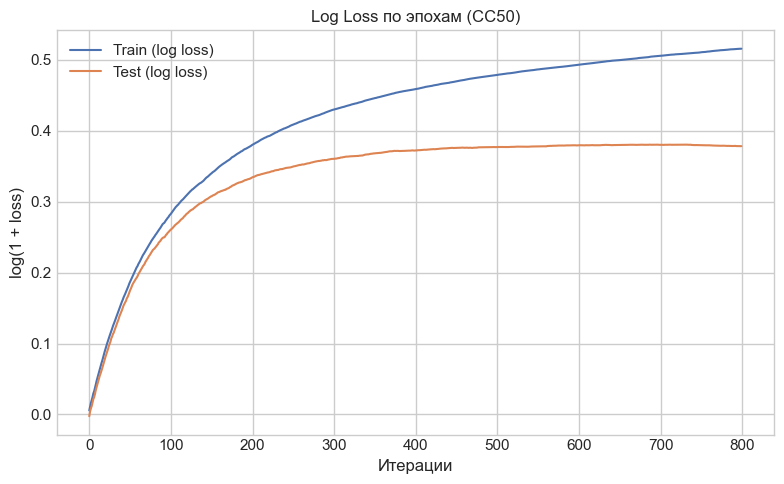

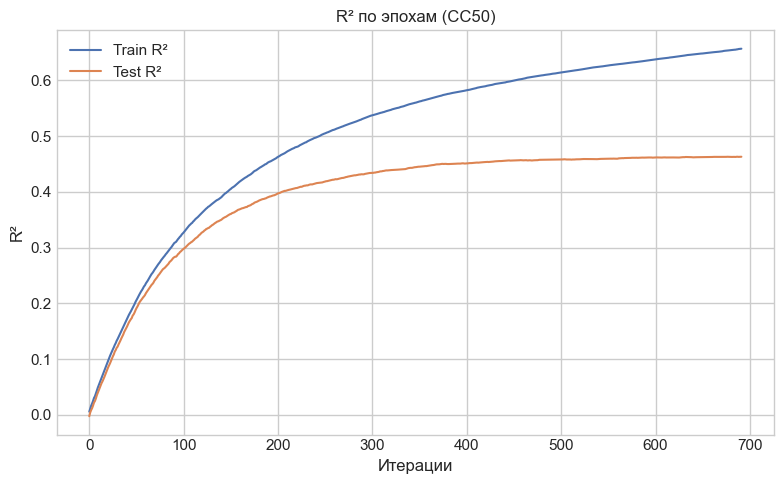

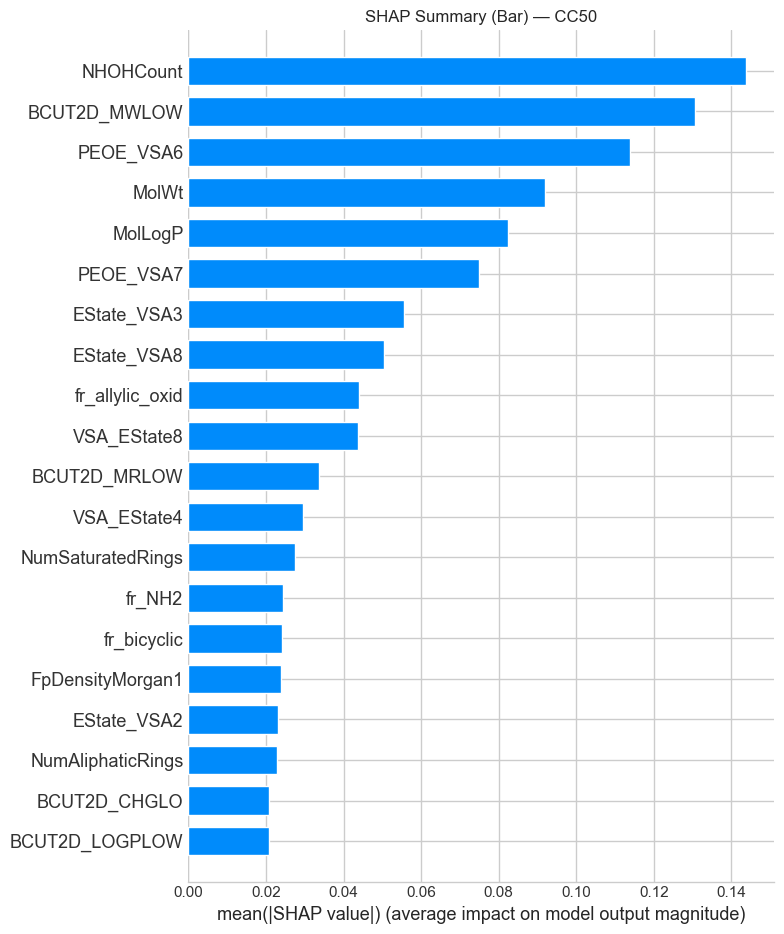

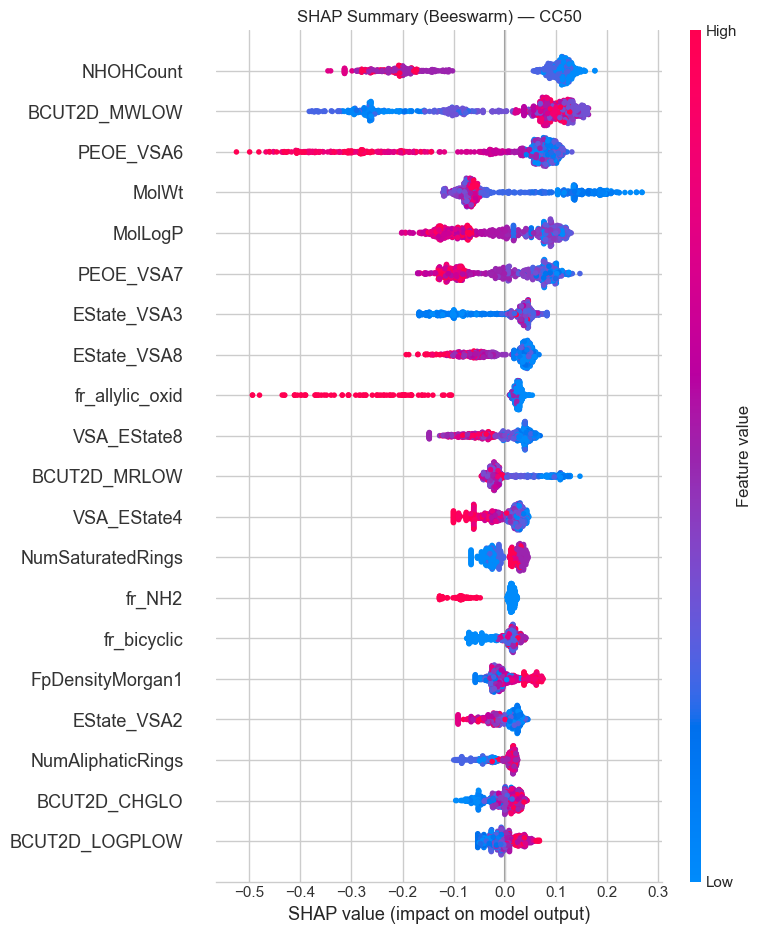

✅ Сохранено 66 признаков: data/selected_features_cc50.txt

📊 SHAP-анализ и обучение модели: SI
📊 Метрики качества:
R²:   0.3213
RMSE: 1.2816
MAE:  0.9471


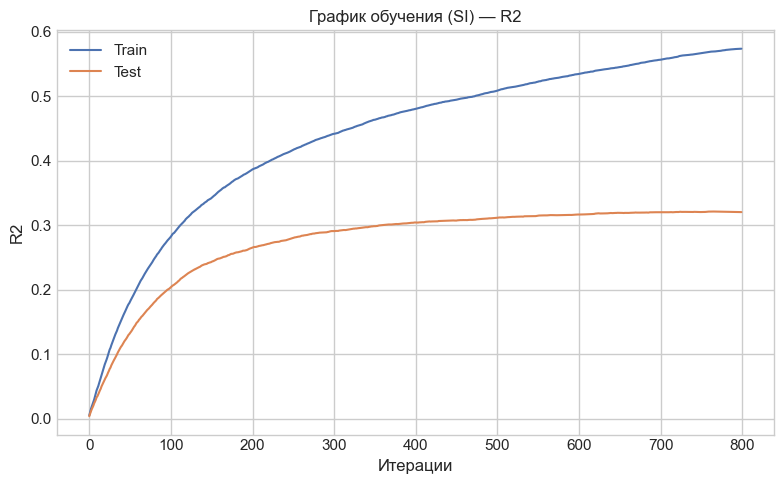

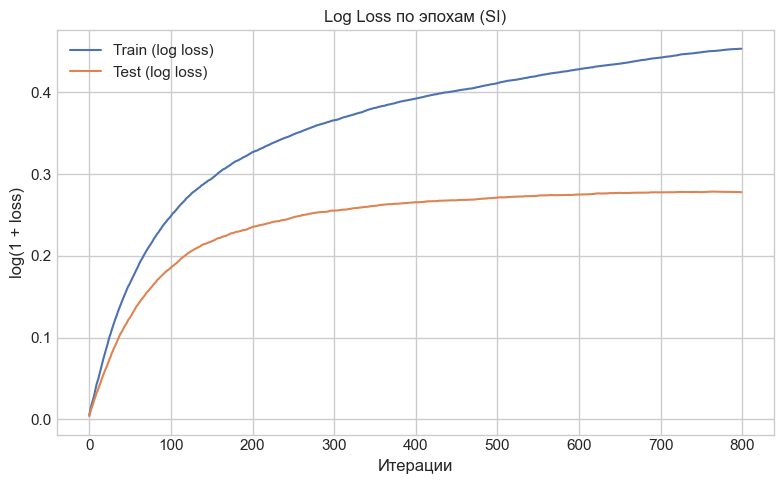

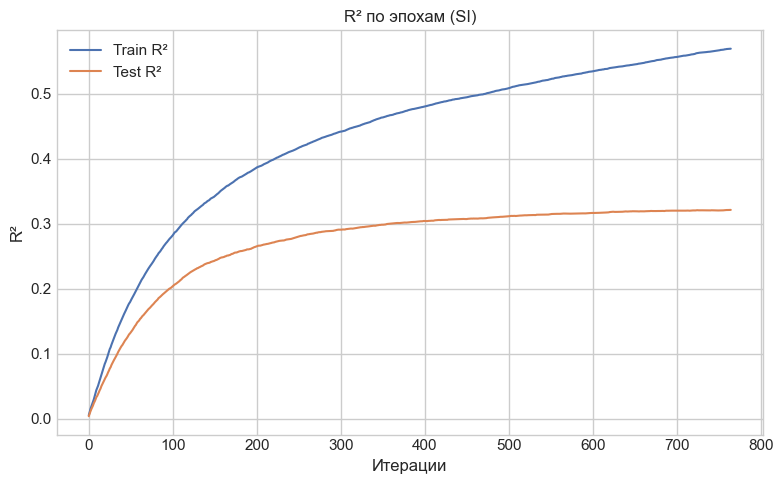

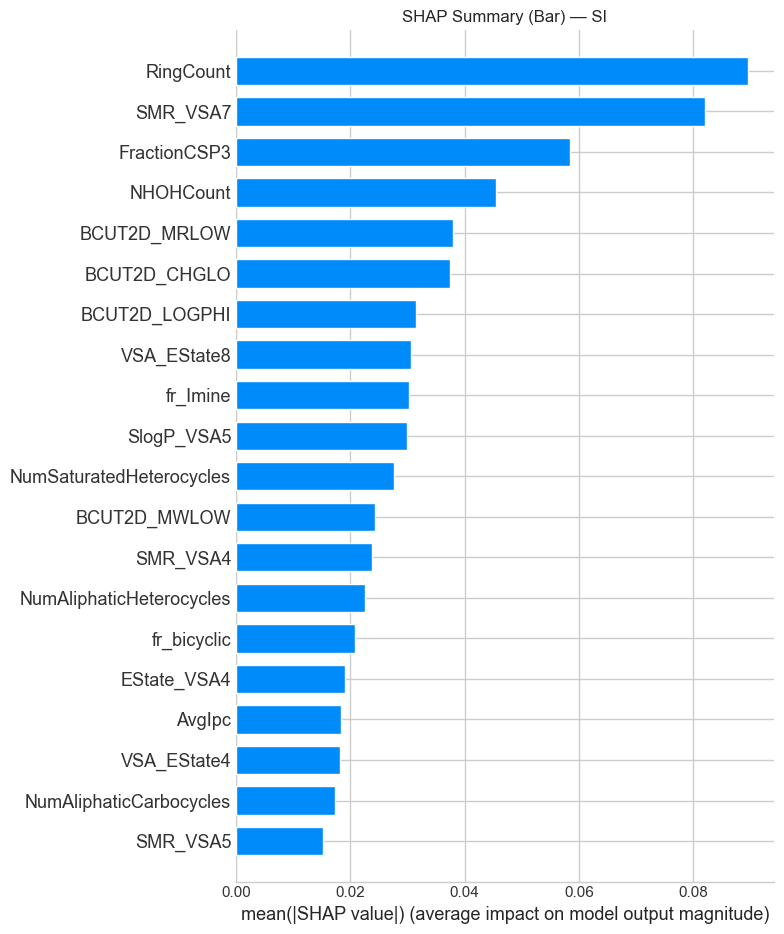

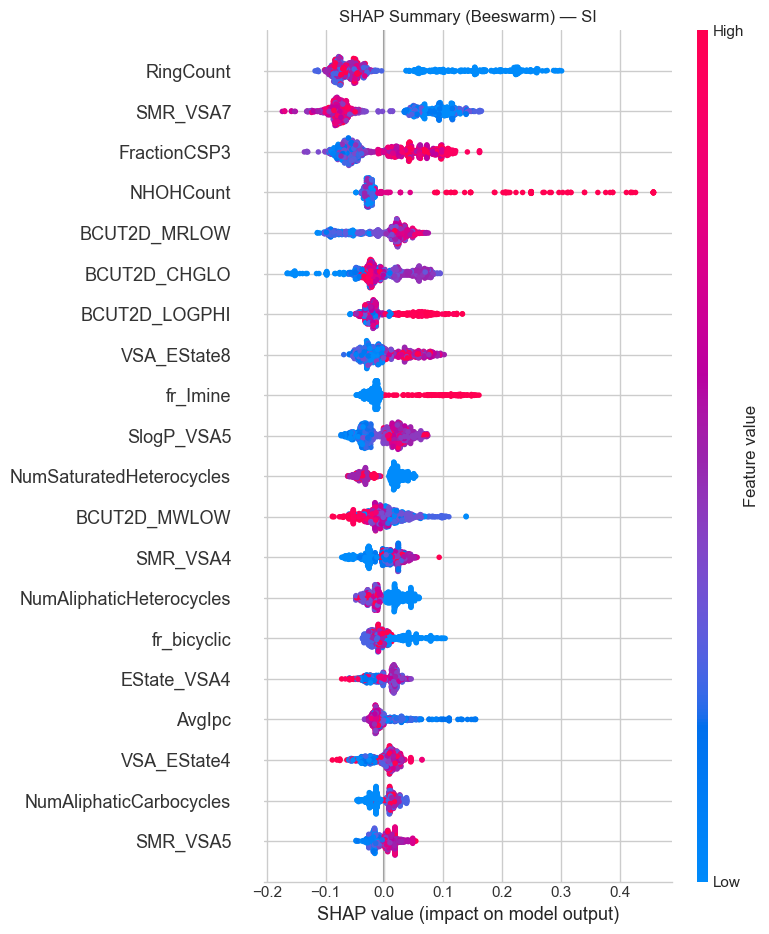

✅ Сохранено 66 признаков: data/selected_features_si.txt


In [22]:
# === ЭТАП 9: SHAP-анализ + визуализация обучения модели CatBoost ===

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
import os
from catboost import CatBoostRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# === Настройки ===
plt.style.use("seaborn-v0_8-whitegrid")
os.makedirs("plotsjp/eda/shap", exist_ok=True)
os.makedirs("data", exist_ok=True)

# === Загрузка данных ===
df = pd.read_excel("data/Данные_для_курсовои_Классическое_МО.xlsx")
X = pd.read_csv("data/X_scaled.csv")

# === Лог-таргеты ===
df["IC50_nM"] = df["IC50, mM"] * 1e6
df["log1p_IC50_nM"] = np.log1p(df["IC50_nM"])
df["log1p_CC50_mM"] = np.log1p(df["CC50, mM"])
df["log1p_SI"] = np.log1p(df["SI"])

# === Таргеты для анализа ===
targets = {
    "IC50": "log1p_IC50_nM",
    "CC50": "log1p_CC50_mM",
    "SI": "log1p_SI"
}

for name, target in targets.items():
    print(f"\n📊 SHAP-анализ и обучение модели: {name}")

    plots_dir = f"plotsjp/eda/shap/{name}"
    os.makedirs(plots_dir, exist_ok=True)

    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # === Обучение модели ===
    model = CatBoostRegressor(
        iterations=800,
        learning_rate=0.01,
        depth=6,
        eval_metric='R2',
        verbose=0,
        random_state=42
    )
    model.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
        use_best_model=True,
        plot=False
    )

    # === Метрики ===
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print("📊 Метрики качества:")
    print("R²:  ", round(r2, 4))
    print("RMSE:", round(rmse, 4))
    print("MAE: ", round(mae, 4))

    # === График обучения ===
    evals_result = model.get_evals_result()
    metric_name = list(evals_result["learn"].keys())[0]

    plt.figure(figsize=(8, 5))
    plt.plot(evals_result["learn"][metric_name], label="Train")
    plt.plot(evals_result["validation"][metric_name], label="Test")
    plt.title(f"График обучения ({name}) — {metric_name}")
    plt.xlabel("Итерации")
    plt.ylabel(metric_name)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{plots_dir}/train_val_curve_{name.lower()}.png")
    plt.show()

    # === График логлосса
    plt.figure(figsize=(8, 5))
    plt.plot(np.log1p(evals_result["learn"][metric_name]), label="Train (log loss)")
    plt.plot(np.log1p(evals_result["validation"][metric_name]), label="Test (log loss)")
    plt.title(f"Log Loss по эпохам ({name})")
    plt.xlabel("Итерации")
    plt.ylabel("log(1 + loss)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{plots_dir}/log_loss_curve_{name.lower()}.png")
    plt.show()

    # === R² по эпохам
    train_r2 = []
    test_r2 = []
    max_trees = model.tree_count_

    for i in range(1, max_trees + 1):
        y_train_pred = model.predict(X_train, ntree_end=i)
        y_test_pred = model.predict(X_test, ntree_end=i)
        train_r2.append(r2_score(y_train, y_train_pred))
        test_r2.append(r2_score(y_test, y_test_pred))

    plt.figure(figsize=(8, 5))
    plt.plot(train_r2, label="Train R²")
    plt.plot(test_r2, label="Test R²")
    plt.title(f"R² по эпохам ({name})")
    plt.xlabel("Итерации")
    plt.ylabel("R²")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{plots_dir}/r2_curve_{name.lower()}.png")
    plt.show()

    # === SHAP-анализ
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)

    # SHAP Bar plot
    shap.summary_plot(shap_values, X, show=False, plot_type="bar")
    plt.title(f"SHAP Summary (Bar) — {name}")
    plt.tight_layout()
    plt.savefig(f"{plots_dir}/shap_summary_bar_{name.lower()}.png")
    plt.show()

    # SHAP Beeswarm plot
    shap.summary_plot(shap_values, X, show=False)
    plt.title(f"SHAP Summary (Beeswarm) — {name}")
    plt.tight_layout()
    plt.savefig(f"{plots_dir}/shap_summary_beeswarm_{name.lower()}.png")
    plt.show()

    # SHAP DataFrame
    shap_df = pd.DataFrame(shap_values, columns=X.columns)
    shap_df.to_csv(f"data/shap_values_{name.lower()}.csv", index=False)

    # Отбор признаков
    selector = SelectFromModel(model, threshold="median", prefit=True)
    selected_features = X.columns[selector.get_support()]
    pd.Series(selected_features).to_csv(f"data/selected_features_{name.lower()}.txt", index=False)
    print(f"✅ Сохранено {len(selected_features)} признаков: data/selected_features_{name.lower()}.txt")


In [23]:
import pandas as pd
import os

os.makedirs("data", exist_ok=True)

tasks = ["ic50", "cc50", "si"]

for task in tasks:
    path = f"data/top_mi_{task}.csv"
    
    # Загружаем MI без squeeze
    mi_df = pd.read_csv(path, index_col=0)
    
    # Преобразуем в Series (если нужно)
    if isinstance(mi_df, pd.DataFrame):
        mi_series = mi_df.iloc[:, 0]
    else:
        mi_series = mi_df

    top_features = mi_series.sort_values(ascending=False).head(20).index.tolist()

    # Сохраняем
    with open(f"data/features_reg_{task}.txt", "w") as f:
        for feature in top_features:
            f.write(f"{feature}\n")

    print(f"✅ Сохранено: data/features_reg_{task}.txt ({len(top_features)} признаков)")


✅ Сохранено: data/features_reg_ic50.txt (20 признаков)
✅ Сохранено: data/features_reg_cc50.txt (20 признаков)
✅ Сохранено: data/features_reg_si.txt (20 признаков)


In [24]:
# === ЭТАП 10: Сохранение финальных X и y для регрессии ===

import os
import pandas as pd
import numpy as np

# 📁 Пути
RAW_PATH = "data/Данные_для_курсовои_Классическое_МО.xlsx"
SCALED_PATH = "data/X_scaled.csv"
FEATURES_DIR = "data"
os.makedirs(FEATURES_DIR, exist_ok=True)

# ✅ Загрузка
df_raw = pd.read_excel(RAW_PATH)
X_scaled = pd.read_csv(SCALED_PATH)
print("✅ Загружены данные:")
print("📄 df_raw:", df_raw.shape)
print("📄 X_scaled:", X_scaled.shape)

# 🎯 Целевые переменные
df_raw["IC50_nM"] = df_raw["IC50, mM"] * 1e6
df_raw["log1p_IC50_nM"] = np.log1p(df_raw["IC50_nM"])
df_raw["CC50_mM"] = df_raw["CC50, mM"]
df_raw["log1p_CC50_mM"] = np.log1p(df_raw["CC50_mM"])
df_raw["SI_raw"] = df_raw["SI"]
df_raw["log1p_SI"] = np.log1p(df_raw["SI_raw"])

# 🗂️ Названия задач
tasks = {
    "ic50": "log1p_IC50_nM",
    "cc50": "log1p_CC50_mM",
    "si": "log1p_SI"
}

# === Загрузка признаков и формирование X, y для каждой задачи ===
for task_key, target_col in tasks.items():
    print(f"\n📦 Подготовка данных для задачи: {task_key.upper()}")

    # === Загрузка признаков ===
    feature_file = f"data/features_reg_{task_key}.txt"
    try:
        with open(feature_file, "r") as f:
            selected_features = [line.strip() for line in f.readlines()]
    except FileNotFoundError:
        print(f"❌ Файл признаков не найден: {feature_file}")
        continue

    # === Валидация: удалим отсутствующие признаки
    missing = [f for f in selected_features if f not in X_scaled.columns]
    if missing:
        print(f"⚠️ Удалены отсутствующие признаки: {missing}")
    selected_features = [f for f in selected_features if f in X_scaled.columns]
    print(f"✅ Загружено признаков: {len(selected_features)}")

    # === Формируем X и y
    X_task = X_scaled[selected_features].copy()
    y_task = df_raw[target_col].copy()

    # === Сохранение
    X_path = f"data/X_{task_key}.csv"
    y_path = f"data/y_{task_key}.csv"
    X_task.to_csv(X_path, index=False)
    y_task.to_csv(y_path, index=False)

    print(f"💾 Сохранено: {X_path}, {y_path}")


✅ Загружены данные:
📄 df_raw: (1001, 214)
📄 X_scaled: (1001, 131)

📦 Подготовка данных для задачи: IC50
⚠️ Удалены отсутствующие признаки: ['ExactMolWt', 'LogMolWt', 'HeavyAtomMolWt', 'Kappa1', 'MinAbsPartialCharge', 'Chi0', 'Chi0n', 'Chi1', 'HeavyAtomCount', 'Kappa2', 'NumValenceElectrons']
✅ Загружено признаков: 9
💾 Сохранено: data/X_ic50.csv, data/y_ic50.csv

📦 Подготовка данных для задачи: CC50
⚠️ Удалены отсутствующие признаки: ['ExactMolWt', 'LogMolWt', 'HeavyAtomMolWt', 'Chi0', 'LabuteASA', 'Chi1', 'NumValenceElectrons', 'Kappa1', 'Chi0v', 'HeavyAtomCount', 'MolMR', 'Polarization', 'Chi0n', 'Chi1v', 'MinAbsPartialCharge', 'Kappa2', 'ChargeAsymmetry']
✅ Загружено признаков: 3
💾 Сохранено: data/X_cc50.csv, data/y_cc50.csv

📦 Подготовка данных для задачи: SI
⚠️ Удалены отсутствующие признаки: ['ChargeAsymmetry', 'MinAbsPartialCharge', 'MaxEStateIndex', 'FpDensityMorgan3']
✅ Загружено признаков: 16
💾 Сохранено: data/X_si.csv, data/y_si.csv


In [25]:
# ==== FINISH =====